# The Chicago crime dataset has been obtained from kaggle.
URL: https://www.kaggle.com/currie32/crimes-in-chicago/data

To get an overview of the different features in the dataset, please visit the following
URL: https://www.kaggle.com/currie32/crimes-in-chicago

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab 
import seaborn as sns

In [2]:
sns.set()

In [3]:
def generate_horizontalBarChart(ax, y_pos, count1, color1, yTickLabels, xLabel, yLabel, plotTitle, rotation, count2=None, color2=None, grouped=True):
    
    width=0.4
    barh1 = ax.barh(y_pos, count1, width, align='center', color=color1)
    
    if grouped:
        barh2 = ax.barh(y_pos + width, count2, width, align='center', color=color2)
        ax.set_yticks(y_pos + width/2)
        ax.legend((barh1[0], barh2[0]), ('Crimes', 'Arrests'), fontsize=16, loc='upper right')
    else:
        ax.set_yticks(y_pos)
    
    ax.set_yticklabels(yTickLabels, fontweight='bold')
    ax.invert_yaxis()  
    ax.set_xlabel(xLabel, fontweight='bold', fontsize=18)
    ax.set_ylabel(yLabel, fontweight='bold', fontsize=18)
    ax.set_title(plotTitle, fontweight='bold')
    
    for cur_tick in ax.get_xticklabels():
        cur_tick.set_rotation(rotation)
        cur_tick.set_fontweight('bold')
    plt.show()

In [4]:
def generate_heatmap(df, plotTitle, cmap):
    sns.heatmap(df, cmap=cmap).set_title(plotTitle)
    plt.show()    

In [5]:
chicago_crimes_2001_04 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False, index_col=0)
print('crimes_2001_04 shape',chicago_crimes_2001_04.shape)
chicago_crimes_2005_07 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False, index_col=0)
print('crimes_2005_07 shape', chicago_crimes_2005_07.shape)
chicago_crimes_2008_11 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False, index_col=0)
print('crimes_2008_11 shape', chicago_crimes_2008_11.shape)
chicago_crimes_2012_17 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False, index_col=0)
print('crimes_2012_17 shape', chicago_crimes_2012_17.shape)

Skipping line 1513591: expected 23 fields, saw 24

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


('crimes_2001_04 shape', (1923515, 22))


Skipping line 533719: expected 23 fields, saw 24



('crimes_2005_07 shape', (1872343, 22))


Skipping line 1149094: expected 23 fields, saw 41



('crimes_2008_11 shape', (2688710, 22))
('crimes_2012_17 shape', (1456714, 22))


In [7]:
crimes_2001_17 = pd.concat([chicago_crimes_2001_04, chicago_crimes_2005_07, chicago_crimes_2008_11, chicago_crimes_2012_17])

In [8]:
crimes_2001_17.shape

(7941282, 22)

In [9]:
crimes_2001_17.columns

Index([u'ID', u'Case Number', u'Date', u'Block', u'IUCR', u'Primary Type',
       u'Description', u'Location Description', u'Arrest', u'Domestic',
       u'Beat', u'District', u'Ward', u'Community Area', u'FBI Code',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object')

In [10]:
print(crimes_2001_17.head(3))

           ID Case Number                    Date                Block  IUCR  \
879   4786321    HM399414  01/01/2004 12:01:00 AM    082XX S COLES AVE  0840   
2544  4676906    HM278933  03/01/2003 12:00:00 AM      004XX W 42ND PL  2825   
2919  4789749    HM402220  06/20/2004 11:00:00 AM  025XX N KIMBALL AVE  1752   

                    Primary Type                    Description  \
879                        THEFT  FINANCIAL ID THEFT: OVER $300   
2544               OTHER OFFENSE        HARASSMENT BY TELEPHONE   
2919  OFFENSE INVOLVING CHILDREN  AGG CRIM SEX ABUSE FAM MEMBER   

     Location Description Arrest Domestic              ...                \
879             RESIDENCE  False    False              ...                 
2544            RESIDENCE  False     True              ...                 
2919            RESIDENCE  False    False              ...                 

      Ward  Community Area  FBI Code  X Coordinate Y Coordinate    Year  \
879    7.0            46.0    

In [11]:
crimes_2001_17.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate             object
Year                    float64
Updated On               object
Latitude                 object
Longitude               float64
Location                 object
dtype: object

In [12]:
crimes_2001_17.isnull().sum()

ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

In [13]:
def process_data_for_heatmap(feature1, feature2, feature1_items_list, feature2_items_list, crimes_df=crimes_2001_17):
    
    data_for_heatmap = []
    
    for cur_feature1_item in feature1_items_list:
    
        temp_df_1 = crimes_df[crimes_df[feature1] == cur_feature1_item]

        for cur_feature2_item in feature2_items_list:

            temp_df_2 = temp_df_1[temp_df_1[feature2] == cur_feature2_item]
            data_for_heatmap.append([cur_feature1_item, cur_feature2_item, temp_df_2.shape[0]])
            
    return data_for_heatmap

In [14]:
def get_arrest_counts(crime_factor_type, crimes_factor_items):
    arrest_counts = []
    for cur_item in crimes_factor_items:
        temp_df = crimes_2001_17[crimes_2001_17[crime_factor_type]==cur_item]
        if True in temp_df['Arrest'].value_counts():
            arrest_counts.append(temp_df['Arrest'].value_counts()[True])
        else:
            arrest_counts.append(0)
    
    return arrest_counts

# Processing data to interpret the number of crimes committed and arrests made based on "crime type" in Chicago from 2001-2017

In [15]:
primary_crime_type_counts = crimes_2001_17['Primary Type'].value_counts()
primary_crime_type_counts = primary_crime_type_counts.to_dict()
primary_crime_type_counts = sorted(primary_crime_type_counts.items(), key=lambda x:x[1], reverse=True)
print('number of crime types', len(primary_crime_type_counts))

('number of crime types', 35)


In [16]:
print(primary_crime_type_counts[0:10])

[('THEFT', 1640506), ('BATTERY', 1442716), ('CRIMINAL DAMAGE', 923000), ('NARCOTICS', 885431), ('OTHER OFFENSE', 491922), ('ASSAULT', 481661), ('BURGLARY', 470958), ('MOTOR VEHICLE THEFT', 370548), ('ROBBERY', 300453), ('DECEPTIVE PRACTICE', 280931)]


In [17]:
unzip_crime_data = zip(*primary_crime_type_counts[0:20])

In [18]:
crime_type = unzip_crime_data[0]
crime_count = unzip_crime_data[1]
arrest_counts_crime_type = get_arrest_counts('Primary Type', crime_type)

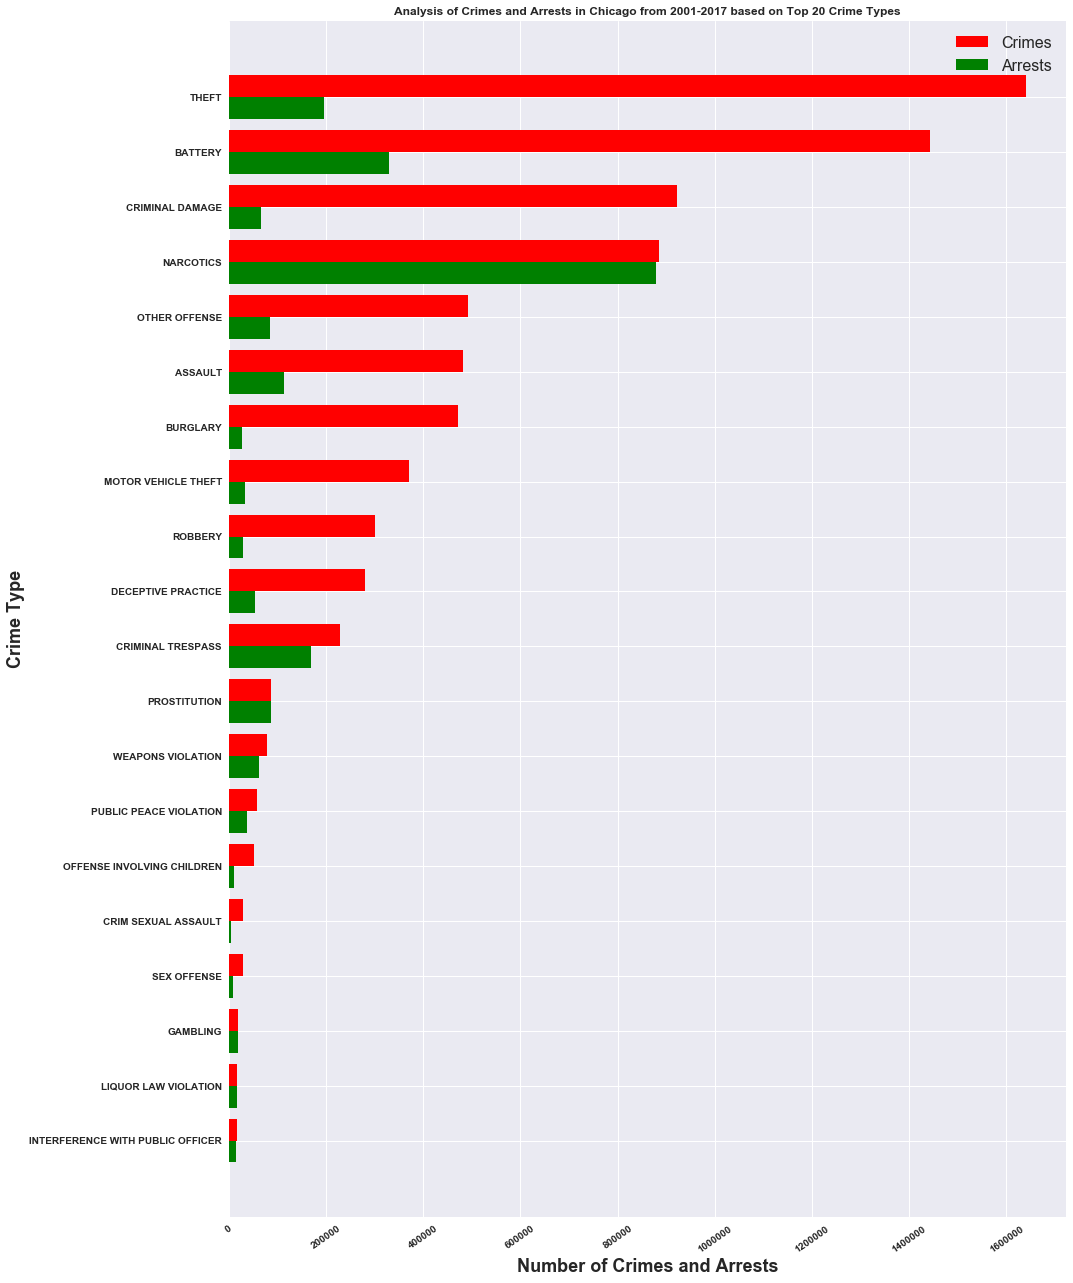

In [19]:
pylab.rcParams['figure.figsize'] = 15, 22
fig1, ax1 = plt.subplots()
generate_horizontalBarChart(ax1, np.arange(len(crime_type)), crime_count, 'red', crime_type, 'Number of Crimes and Arrests', 'Crime Type', 'Analysis of Crimes and Arrests in Chicago from 2001-2017 based on Top 20 Crime Types', 35, arrest_counts_crime_type, 'green')

# Processing data to interpret the number of crimes committed and arrests made based on "crime location" in Chicago from 2001-2017

In [20]:
crime_location_counts = crimes_2001_17['Location Description'].value_counts()
crime_location_counts = crime_location_counts.to_dict()
crime_location_counts = sorted(crime_location_counts.items(), key=lambda x:x[1], reverse=True)
print('Number of crime locations',len(crime_location_counts))

('Number of crime locations', 172)


In [21]:
unzip_crime_location_data = zip(*crime_location_counts[0:20])

In [22]:
crime_location_type = unzip_crime_location_data[0]
crime_location_count = unzip_crime_location_data[1]
arrest_counts_crime_location = get_arrest_counts('Location Description', crime_location_type)

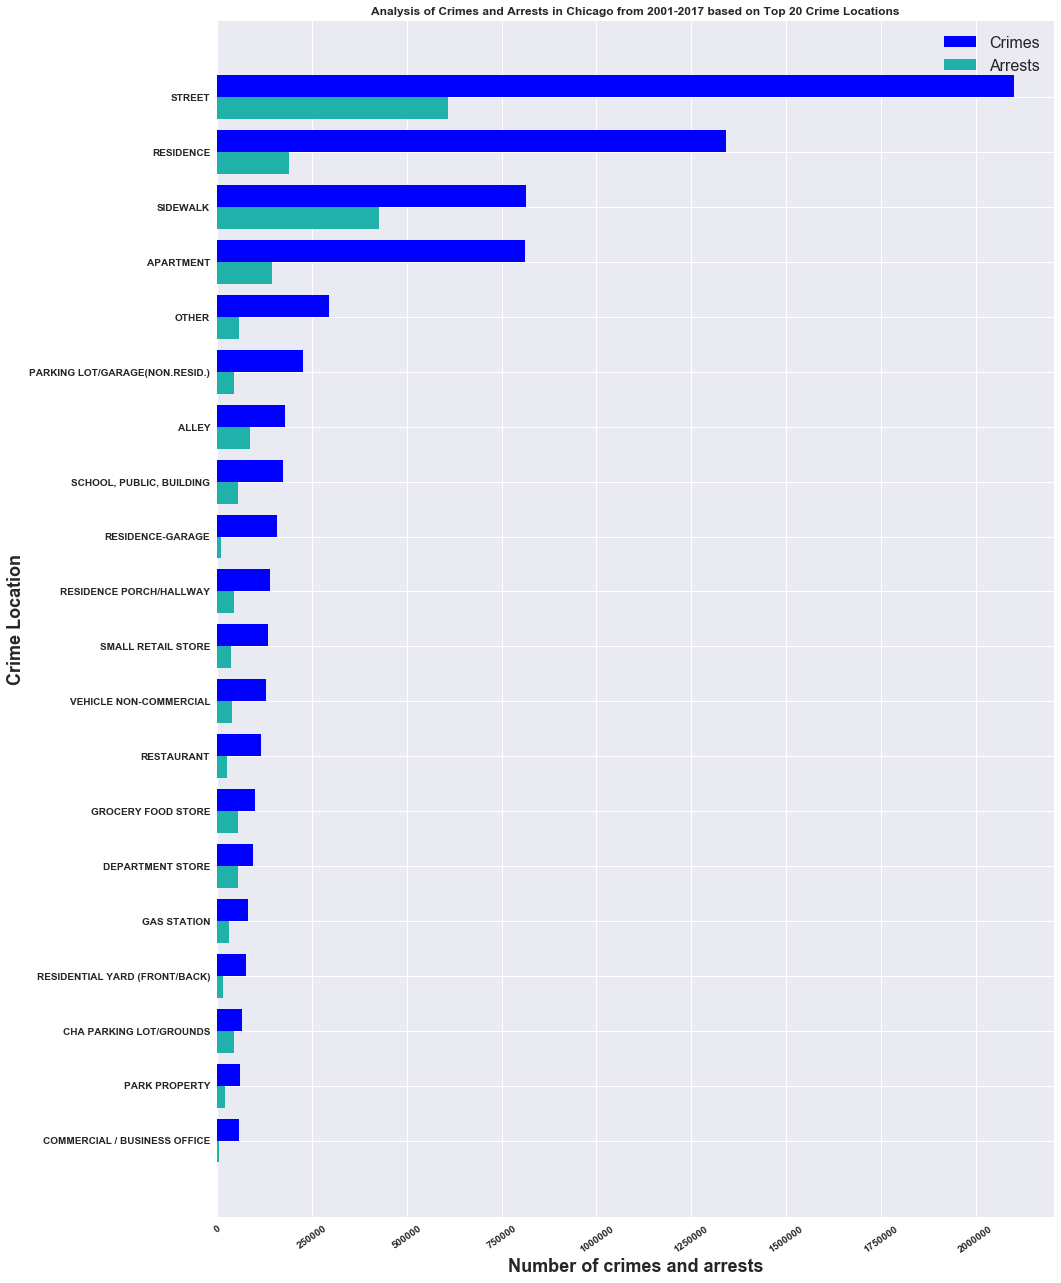

In [23]:
fig2, ax2 = plt.subplots()
generate_horizontalBarChart(ax2, np.arange(len(crime_location_type)), crime_location_count, 'blue', crime_location_type, 'Number of crimes and arrests', 'Crime Location', 'Analysis of Crimes and Arrests in Chicago from 2001-2017 based on Top 20 Crime Locations', 35, arrest_counts_crime_location, '#20b2aa')

# Processing data to generate a heatmap to understand the impact of "top 20 crime types"  and "top 20 crime locations" on the "number of crimes" in Chicago

In [24]:
crime_type_top20 = crime_type[0:20]
crime_location_type_top20 = crime_location_type[0:20]
crime_type_location_list = process_data_for_heatmap('Primary Type', 'Location Description', crime_type_top20, crime_location_type_top20)

In [25]:
crime_type_location_df = pd.DataFrame(data=crime_type_location_list, columns=['Crime Type', 'Crime Location', 'Count'])
crime_type_location_df.head()

,Crime Type,Crime Location,Count
0,THEFT,STREET,458057
1,THEFT,RESIDENCE,176153
2,THEFT,SIDEWALK,51984
3,THEFT,APARTMENT,76819
4,THEFT,OTHER,93372


In [26]:
crime_type_location_df = crime_type_location_df.pivot('Crime Location', 'Crime Type', 'Count')
crime_type_location_df.head()

Crime Type,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,INTERFERENCE WITH PUBLIC OFFICER,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
Crime Location,,,,,,,,,,,,,,,,,,,,
ALLEY,10923,31992,529,2076,16261,953,1353,1089,747,711,6075,56652,194,2978,1039,1663,20975,1496,15917,5126
APARTMENT,58379,283982,134815,7544,93235,16816,17871,67,358,129,548,14862,12379,74755,146,2259,5220,3833,76819,5121
CHA PARKING LOT/GROUNDS,3642,10623,146,32,2918,16626,188,449,120,67,796,24691,50,546,30,255,1051,60,1900,869
COMMERCIAL / BUSINESS OFFICE,2715,2242,6123,42,8047,1548,6119,10,8,19,287,140,44,9081,60,608,404,105,20351,42
DEPARTMENT STORE,1572,1823,832,8,1198,1464,6237,0,6,4,39,152,24,683,1,171,934,87,79892,32


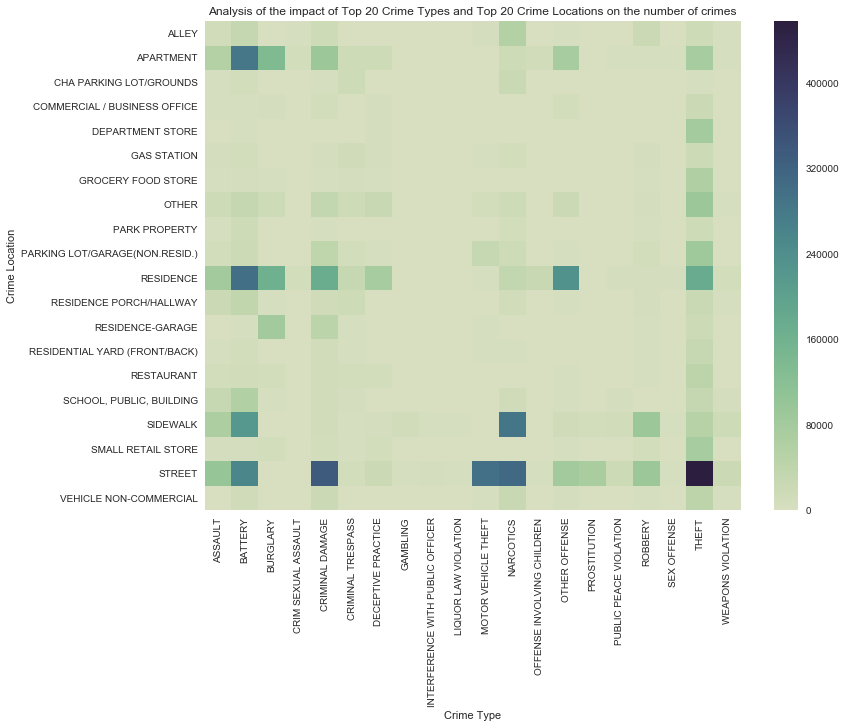

In [27]:
pylab.rcParams['figure.figsize'] = 12, 9
generate_heatmap(crime_type_location_df, 'Analysis of the impact of Top 20 Crime Types and Top 20 Crime Locations on the number of crimes', sns.cubehelix_palette(10, start=.5, rot=-.75, as_cmap=True))

# Processing data to interpret the number of crimes committed based on different factors such as "Month", "Day" and "Hour" in Chicago from 2001-2017


In [28]:
month_mapping = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

def getMonth(val):
    month = int(val.split(' ')[0].split('/')[0])
    return month

crimes_2001_17['Month'] = crimes_2001_17['Date'].apply(getMonth)

In [29]:
def getMonthInWords(month):
    return month_mapping[month]

crimes_2001_17['Month_Words'] = crimes_2001_17['Month'].apply(getMonthInWords)

In [30]:
from datetime import date
import calendar

def get_DayName(cur_date):
    temp_date = cur_date.split(' ')[0].split('/')
    d = date(int(temp_date[2]), int(temp_date[0]), int(temp_date[1]))
    return calendar.day_name[d.weekday()]

crimes_2001_17['DayName'] = crimes_2001_17['Date'].apply(get_DayName)

In [31]:
def get_hour(cur_date):
    #returning hour in 24 hours format
    cur_date = cur_date.split(' ')
    hour = int(cur_date[1].split(':')[0])
    time_period = cur_date[2].upper()
    
    if hour == 12 and time_period == 'AM':
        return 0
    elif hour == 12 and time_period == 'PM':
        return 12
    elif time_period == 'AM':
        return hour
    else:
        return hour + 12



In [32]:
crimes_2001_17['Hour'] = crimes_2001_17['Date'].apply(get_hour)

In [33]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
crime_counts_by_month = []
for cur_month in month_names:
    temp_df_4 = crimes_2001_17[crimes_2001_17['Month_Words']==cur_month]
    crime_counts_by_month.append(temp_df_4.shape[0])

In [34]:
arrest_counts_by_month = get_arrest_counts('Month_Words', month_names)

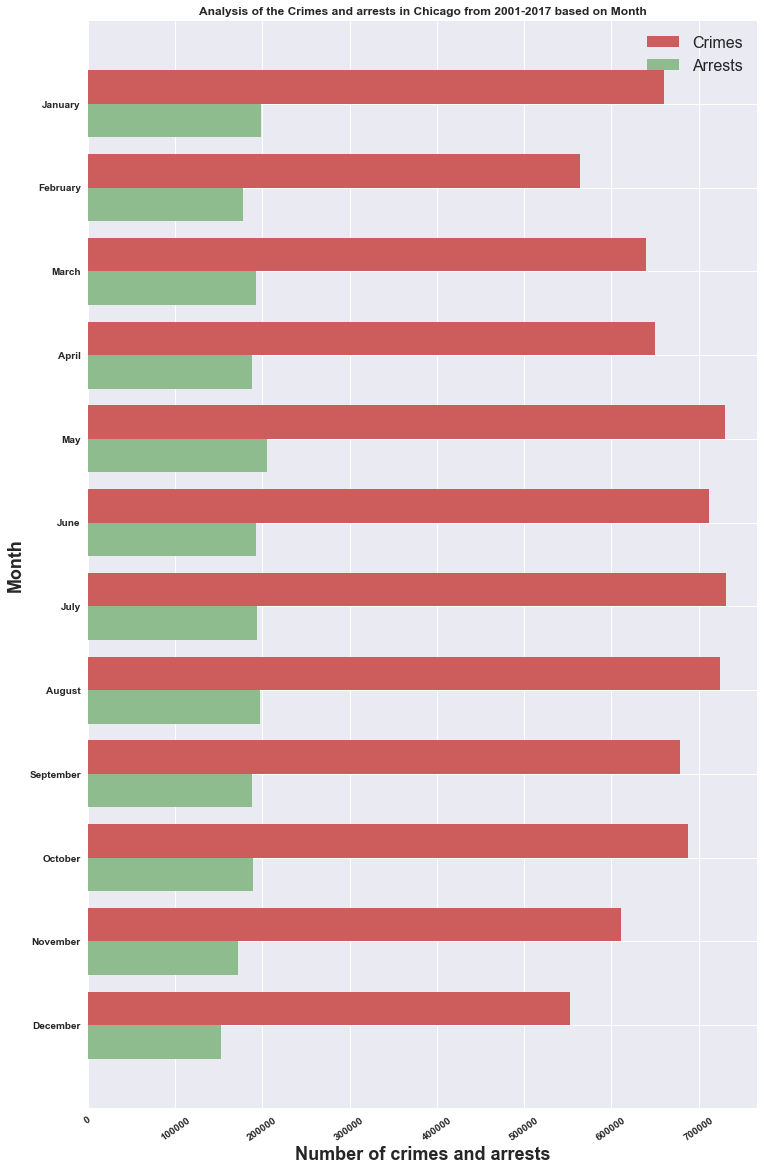

In [35]:
pylab.rcParams['figure.figsize'] = 12, 20
fig3, ax3 = plt.subplots()

generate_horizontalBarChart(ax3, np.arange(len(month_names)), crime_counts_by_month, '#cd5c5c', month_names, 'Number of crimes and arrests', 'Month', 'Analysis of the Crimes and arrests in Chicago from 2001-2017 based on Month', 35, arrest_counts_by_month, '#8fbc8f')

In [36]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_counts_by_day = []

for cur_day_name in day_names:
    temp_df_5 = crimes_2001_17[crimes_2001_17['DayName']==cur_day_name]
    crime_counts_by_day.append(temp_df_5.shape[0])

In [37]:
arrest_counts_by_day = get_arrest_counts('DayName', day_names)

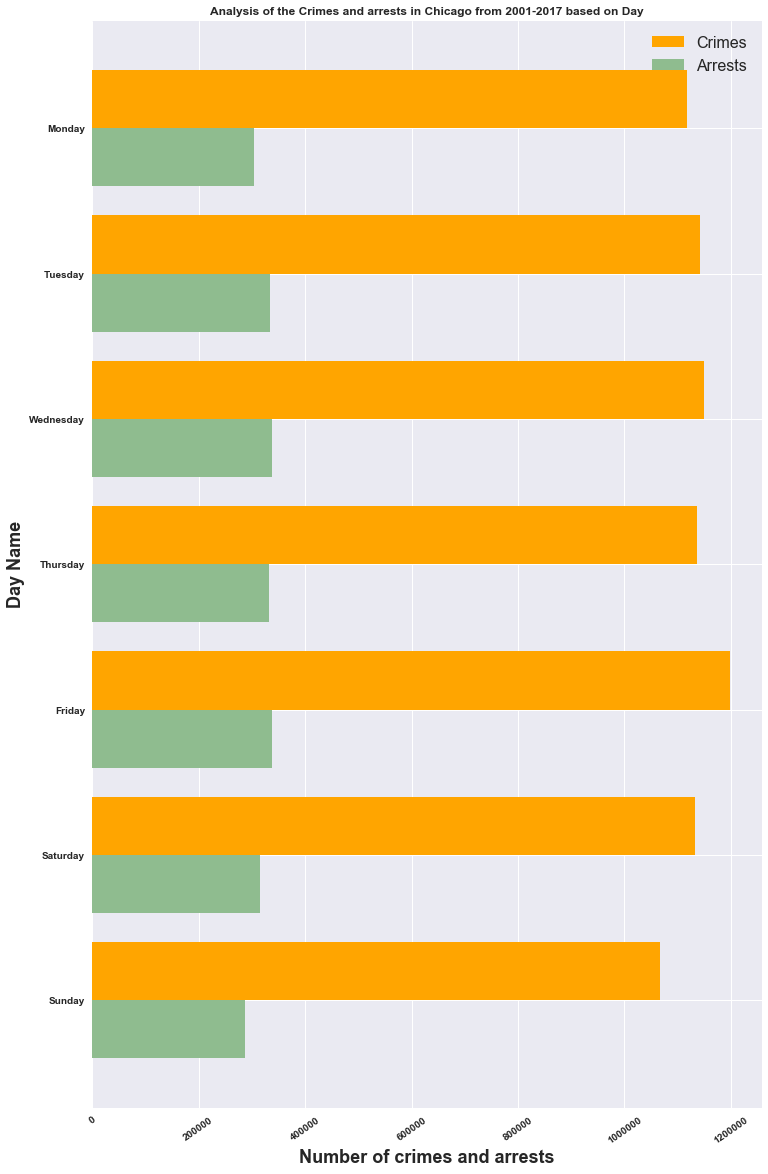

In [38]:
fig4, ax4 = plt.subplots()

generate_horizontalBarChart(ax4, np.arange(len(day_names)), crime_counts_by_day, 'orange', day_names, 'Number of crimes and arrests', 'Day Name', 'Analysis of the Crimes and arrests in Chicago from 2001-2017 based on Day', 35, arrest_counts_by_day, '#8fbc8f')

# Processing data to generate a heatmap to understand the impact of "month" and "day" on the "number of crimes" in Chicago

In [39]:
crime_counts_by_month_day = process_data_for_heatmap('DayName', 'Month_Words', day_names, month_names)

In [40]:
crime_counts_by_month_day_df = pd.DataFrame(data=crime_counts_by_month_day, columns=['Day', 'Month', 'Count'])
crime_counts_by_month_day_df.head()

,Day,Month,Count
0,Monday,January,92385
1,Monday,February,78843
2,Monday,March,89904
3,Monday,April,92113
4,Monday,May,101661


In [41]:
crime_counts_by_month_day_df = crime_counts_by_month_day_df.pivot('Month', 'Day', 'Count')
crime_counts_by_month_day_df.head()

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,97992,92113,91109,86158,93484,93899,94999
August,108404,101951,104345,102245,101716,102215,103646
December,82923,79083,79193,71879,78734,79781,80954
February,89029,78843,79265,73854,81099,79803,82285
January,98691,92385,93587,84523,96402,98347,96422


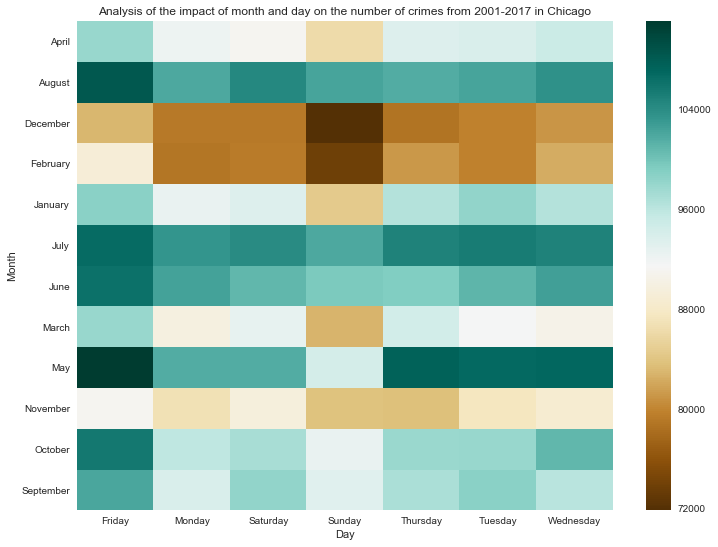

In [42]:
pylab.rcParams['figure.figsize'] = 12, 9
generate_heatmap(crime_counts_by_month_day_df, 'Analysis of the impact of month and day on the number of crimes from 2001-2017 in Chicago', 'BrBG')

# Processing data to generate a heatmap to understand the impact of "top 20 crime types" and "Month" on the "number of crimes" in Chicago

In [43]:
crime_counts_by_month_crimeType = process_data_for_heatmap('Primary Type', 'Month_Words', crime_type_top20, month_names)

In [44]:
crime_counts_by_month_crimeType_df = pd.DataFrame(data=crime_counts_by_month_crimeType, columns=['Crime Type', 'Month', 'Count'])
crime_counts_by_month_crimeType_df.head()

,Crime Type,Month,Count
0,THEFT,January,134051
1,THEFT,February,109186
2,THEFT,March,122636
3,THEFT,April,127487
4,THEFT,May,143916


In [45]:
crime_counts_by_month_crimeType_df = crime_counts_by_month_crimeType_df.pivot('Crime Type', 'Month', 'Count')
crime_counts_by_month_crimeType_df.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Crime Type,,,,,,,,,,,,
ASSAULT,41013,44107,30288,33629,35975,45466,45969,39762,48538,33708,40492,42714
BATTERY,121661,129714,93090,100189,110782,138318,141834,118529,144258,102544,119151,122646
BURGLARY,34799,44937,37521,29302,37901,43681,40851,32821,41428,40535,44207,42975
CRIM SEXUAL ASSAULT,2292,2795,1903,2097,2847,2880,2761,2316,2677,2155,2497,2648
CRIMINAL DAMAGE,79134,85060,61429,60293,70349,86363,83902,74497,86810,74110,83244,77809


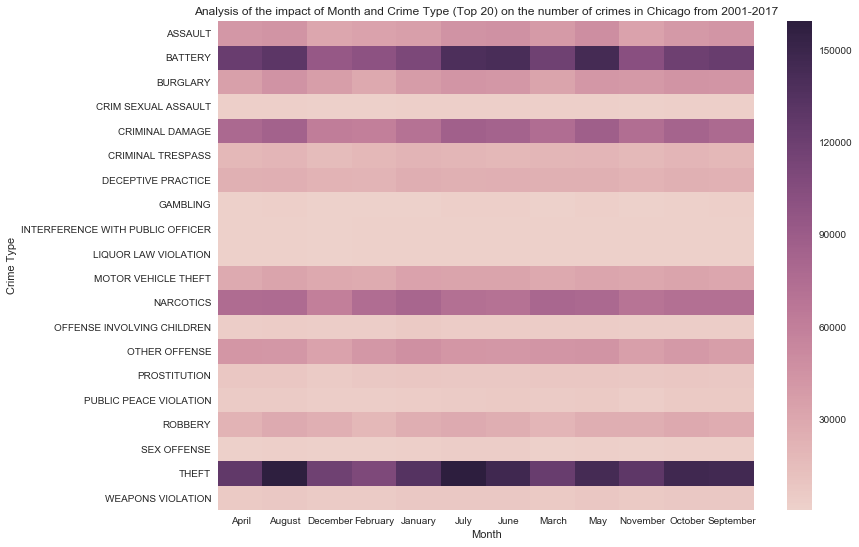

In [46]:
generate_heatmap(crime_counts_by_month_crimeType_df, 'Analysis of the impact of Month and Crime Type (Top 20) on the number of crimes in Chicago from 2001-2017', sns.cubehelix_palette(as_cmap=True))

# Processing data to generate a heatmap to understand the impact of "Month" and "top 20 crime locations" on the "number of crimes" in Chicago

In [47]:
crime_counts_by_month_crimeLocationType = process_data_for_heatmap('Location Description', 'Month_Words', crime_location_type_top20, month_names)

In [48]:
crime_counts_by_month_crimeLocationType_df = pd.DataFrame(data=crime_counts_by_month_crimeLocationType, columns=['Crime Location', 'Month', 'Count'])
crime_counts_by_month_crimeLocationType_df.head()

,Crime Location,Month,Count
0,STREET,January,170670
1,STREET,February,147089
2,STREET,March,167583
3,STREET,April,171055
4,STREET,May,191046


In [49]:
crime_counts_by_month_crimeLocationType_df = crime_counts_by_month_crimeLocationType_df.pivot('Crime Location', 'Month', 'Count')
crime_counts_by_month_crimeLocationType_df.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Crime Location,,,,,,,,,,,,
ALLEY,15295,18550,10441,9974,11723,18923,17655,13296,17763,13614,15989,16932
APARTMENT,66825,70892,63674,59610,71211,72434,71419,67140,73013,64075,66945,65274
CHA PARKING LOT/GROUNDS,5257,6195,3692,4987,6172,6378,5995,4901,6123,4636,5281,5507
COMMERCIAL / BUSINESS OFFICE,4695,5037,4263,4760,5652,5054,5080,4779,5158,4332,4801,4589
DEPARTMENT STORE,7468,8138,9428,6897,8273,7771,8016,7557,8216,8135,7915,7387


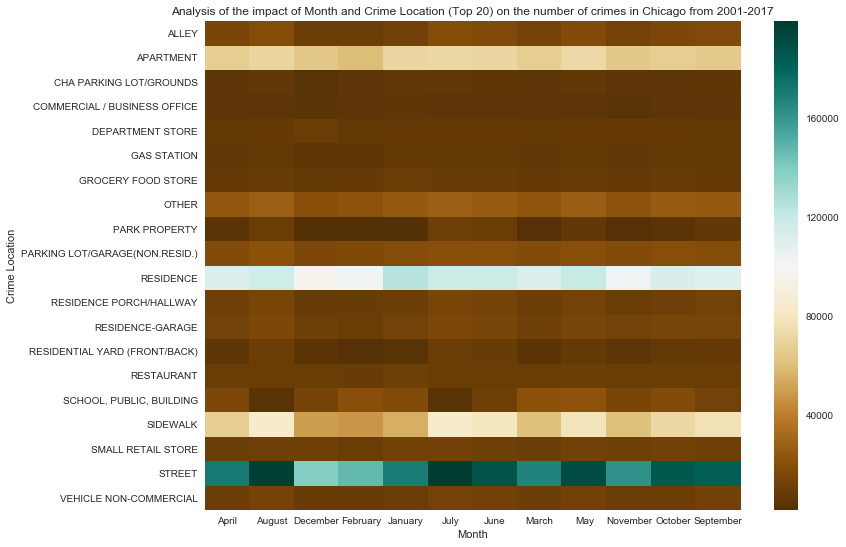

In [51]:
generate_heatmap(crime_counts_by_month_crimeLocationType_df, 'Analysis of the impact of Month and Crime Location (Top 20) on the number of crimes in Chicago from 2001-2017', 'BrBG')

# Processing data to interpret the number of crimes committed and arrests made based on "community area" in Chicago from 2001-2017

The community area names of Chicago were obtained from this URL:https://www.cityofchicago.org/content/dam/city/depts/doit/general/GIS/Chicago_Maps/Citywide_Maps/Community_Areas_W_Numbers.pdf

Data obtained from the URL was used to build the json file.

In [52]:
import json

with open('chicago_community_areas.json') as community_areas_names:
    community_areas_names_data = json.load(community_areas_names)

community_areas_names_data = {int(key):val for key,val in community_areas_names_data.items()}

print(community_areas_names_data)

{1: u'Rogers Park', 2: u'West Ridge', 3: u'Uptown', 4: u'Lincoln Square', 5: u'North Center', 6: u'Lake View', 7: u'Lincoln Park', 8: u'Near North Side', 9: u'Edison Park', 10: u'Norwood Park', 11: u'Jefferson Park', 12: u'Forest Glen', 13: u'North Park', 14: u'Albany Park', 15: u'Portage Park', 16: u'Irving Park', 17: u'Dunning', 18: u'Montclare', 19: u'Belmont Cragin', 20: u'Hermosa', 21: u'Avondale', 22: u'Logan Square', 23: u'Humboldt Park', 24: u'West Town', 25: u'Austin', 26: u'West Garfield Park', 27: u'East Garfield Park', 28: u'Near West Side', 29: u'North Lawndale', 30: u'South Lawndale', 31: u'Lower West Side', 32: u'Loop', 33: u'Near South Side', 34: u'Armour Square', 35: u'Douglas', 36: u'Oakland', 37: u'Fuller Park', 38: u'Grand Boulevard', 39: u'Kenwood', 40: u'Washington Park', 41: u'Hyde Park', 42: u'Woodlawn', 43: u'South Shore', 44: u'Chatham', 45: u'Avalon Park', 46: u'South Chicago', 47: u'Burnside', 48: u'Calumet Heights', 49: u'Roseland', 50: u'Pullman', 51: u'So

In [53]:
def get_community_area_name(community_area_code):
    if np.isnan(community_area_code) or community_area_code == 0:
        return np.nan
    else:
        return community_areas_names_data[community_area_code]

In [54]:
crimes_2001_17['Community Area Name'] = crimes_2001_17['Community Area'].apply(get_community_area_name)

In [55]:
crime_community_area_counts = crimes_2001_17['Community Area Name'].value_counts()
crime_community_area_counts = crime_community_area_counts.to_dict()
crime_community_area_counts = sorted(crime_community_area_counts.items(), key=lambda x:x[1], reverse=True)

In [56]:
unzip_crime_community_area_data = zip(*crime_community_area_counts[0:20])

In [57]:
crime_community_area = unzip_crime_community_area_data[0]
crime_community_area_count = unzip_crime_community_area_data[1]
arrest_counts_by_community_area = get_arrest_counts('Community Area Name', crime_community_area)

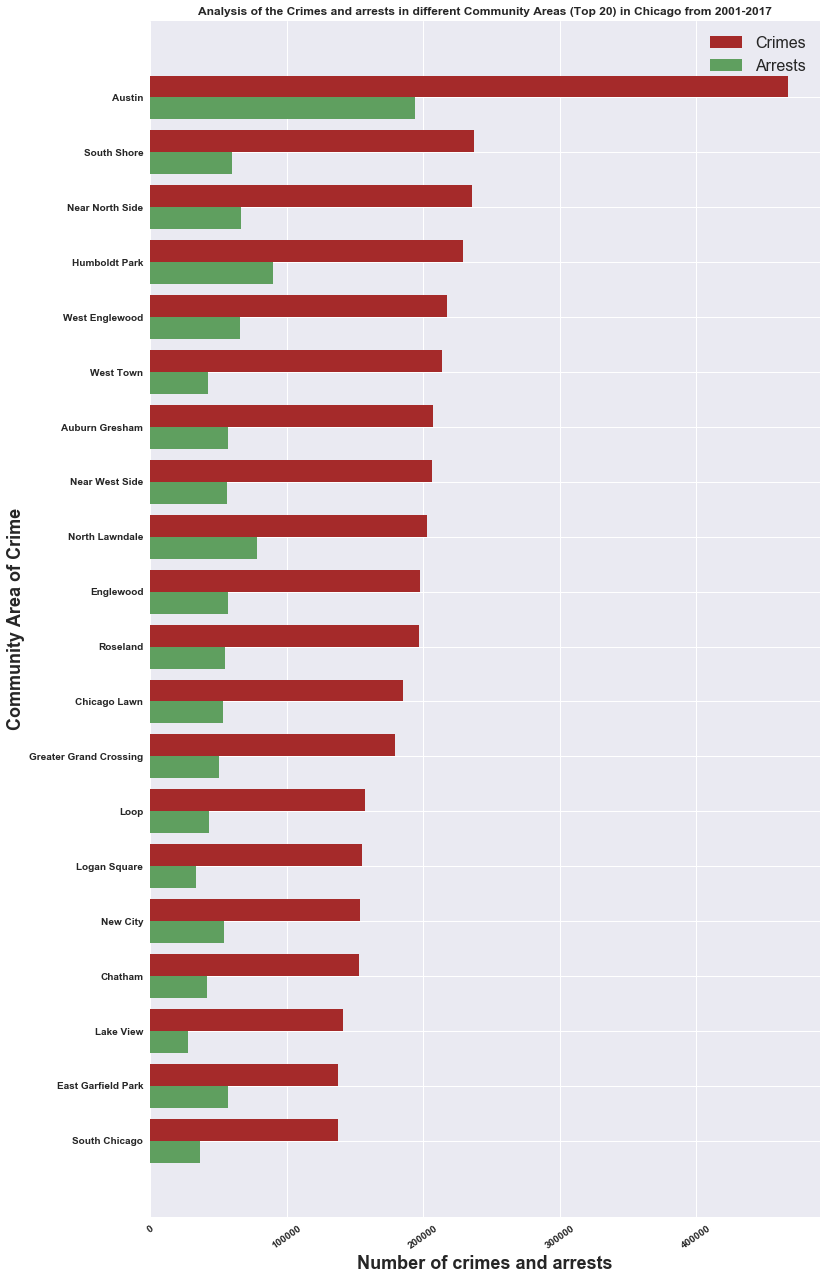

In [58]:
pylab.rcParams['figure.figsize'] = 12, 22
fig5, ax5 = plt.subplots()
generate_horizontalBarChart(ax5, np.arange(len(crime_community_area)), crime_community_area_count, 'brown', crime_community_area, 'Number of crimes and arrests', 'Community Area of Crime', 'Analysis of the Crimes and arrests in different Community Areas (Top 20) in Chicago from 2001-2017', 35, arrest_counts_by_community_area, '#5f9f5f')

# Processing data to interpret the number of crimes committed and arrests made based on "police district" in Chicago from 2001-2017

In [59]:
crime_district_counts = crimes_2001_17['District'].value_counts()
crime_district_counts = crime_district_counts.to_dict()
crime_district_counts = sorted(crime_district_counts.items(), key=lambda x:x[1], reverse=True)

In [60]:
unzip_crime_district_data = zip(*crime_district_counts[0:20])

In [61]:
crime_district = unzip_crime_district_data[0]
crime_district = map(int, crime_district)
crime_district_count = unzip_crime_district_data[1]
arrests_count_based_on_district = get_arrest_counts('District', crime_district)

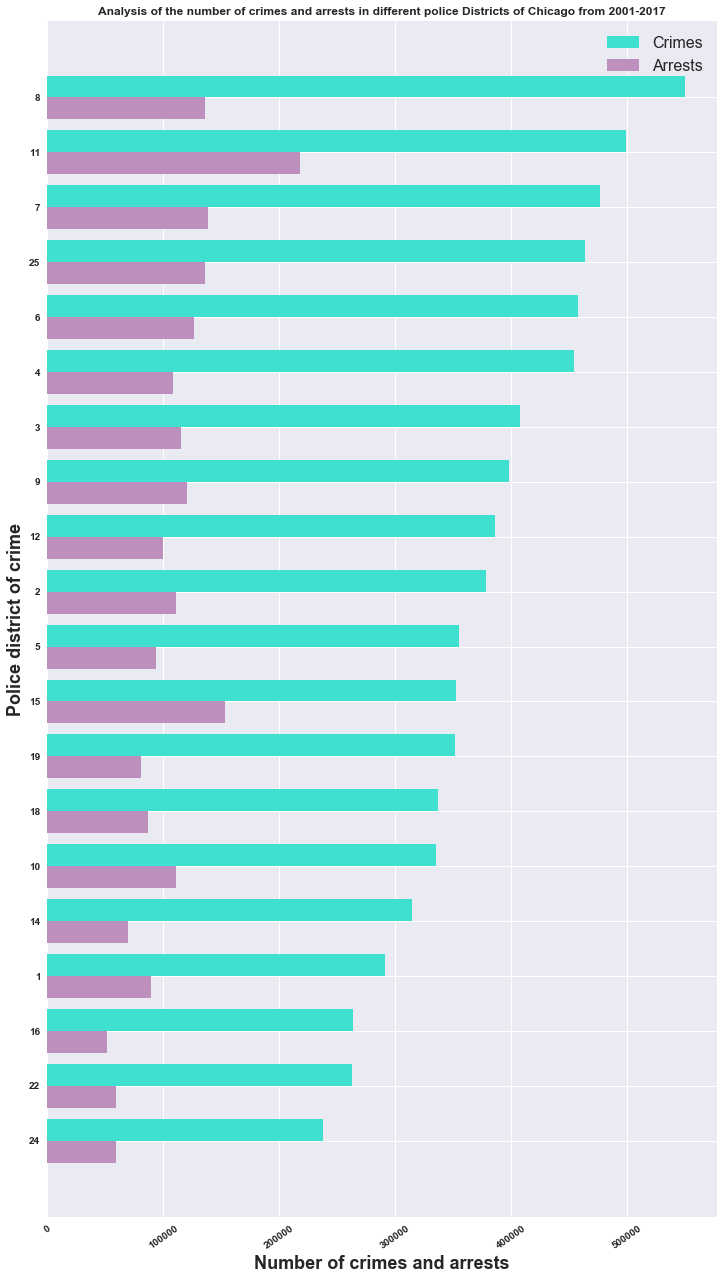

In [62]:
fig6, ax6 = plt.subplots()
generate_horizontalBarChart(ax6, np.arange(len(crime_district)), crime_district_count, 'turquoise', crime_district, 'Number of crimes and arrests', 'Police district of crime', 'Analysis of the number of crimes and arrests in different police Districts of Chicago from 2001-2017', 35, arrests_count_based_on_district, '#bc8fbc')

# Processing data to understand how the number of crimes and arrest percentage has varied over the years in Chicago

In [63]:
crimes_by_year = []
for year in range(2001,2018):
    temp_df_3 = crimes_2001_17[crimes_2001_17['Year']==year]
    #print(temp_df_3['Arrest'].value_counts())
    arrest_counts = temp_df_3['Arrest'].value_counts()
    arrest_counts = arrest_counts.to_dict()
    #print(arrest_counts[True])
    arrest_percent = (arrest_counts[True]/float(temp_df_3.shape[0]))*100
    crimes_by_year.append([year, temp_df_3.shape[0], arrest_percent])
    print('year', year, 'count', temp_df_3.shape[0], 'arrest %', arrest_percent)

('year', 2001, 'count', 568517, 'arrest %', 29.531043047085664)
('year', 2002, 'count', 490879, 'arrest %', 29.091690620295431)
('year', 2003, 'count', 475913, 'arrest %', 29.732114903354184)
('year', 2004, 'count', 388205, 'arrest %', 30.056542290799964)
('year', 2005, 'count', 455811, 'arrest %', 30.968756787352653)
('year', 2006, 'count', 794684, 'arrest %', 30.676470144107594)
('year', 2007, 'count', 621848, 'arrest %', 30.575156629915995)
('year', 2008, 'count', 852053, 'arrest %', 25.728681197061686)
('year', 2009, 'count', 783900, 'arrest %', 28.199004975124375)
('year', 2010, 'count', 700691, 'arrest %', 27.330592229670426)
('year', 2011, 'count', 352066, 'arrest %', 27.33152306669772)
('year', 2012, 'count', 335670, 'arrest %', 26.964280394435008)
('year', 2013, 'count', 306703, 'arrest %', 28.11156069552629)
('year', 2014, 'count', 274527, 'arrest %', 28.797531754617943)
('year', 2015, 'count', 262995, 'arrest %', 26.387193672883512)
('year', 2016, 'count', 265462, 'arrest %'

In [64]:
# Looking at the result of the above cell, the crime count in 2017 seems like an anamoly
# we have to investigate whether the crimes have actually decreased or the dataset is limited with respect to the year 2017.

year_2017_df = crimes_2001_17[crimes_2001_17['Year']==2017]
for cur_month in month_names:
    temp_df = year_2017_df[year_2017_df['Month_Words'] == cur_month]
    print('month', cur_month, 'crime count', temp_df.shape[0])

('month', 'January', 'crime count', 11357)
('month', 'February', 'crime count', 0)
('month', 'March', 'crime count', 0)
('month', 'April', 'crime count', 0)
('month', 'May', 'crime count', 0)
('month', 'June', 'crime count', 0)
('month', 'July', 'crime count', 0)
('month', 'August', 'crime count', 0)
('month', 'September', 'crime count', 0)
('month', 'October', 'crime count', 0)
('month', 'November', 'crime count', 0)
('month', 'December', 'crime count', 0)


In [65]:
#From the above result, it looks like the crimes have been recorded till Jan 2017 in the dataset
#In understanding how the crimes have varied since 2001, we will have to discard the year 2017,
#otherwise it will give an inaccurate picture
crimes_by_year = crimes_by_year[0:16]
crimes_by_year_df = pd.DataFrame(data=crimes_by_year, columns=['Year', 'Crime Count', 'Arrest Percentage'])
crimes_by_year_df.head()

,Year,Crime Count,Arrest Percentage
0,2001,568517,29.531043
1,2002,490879,29.091691
2,2003,475913,29.732115
3,2004,388205,30.056542
4,2005,455811,30.968757


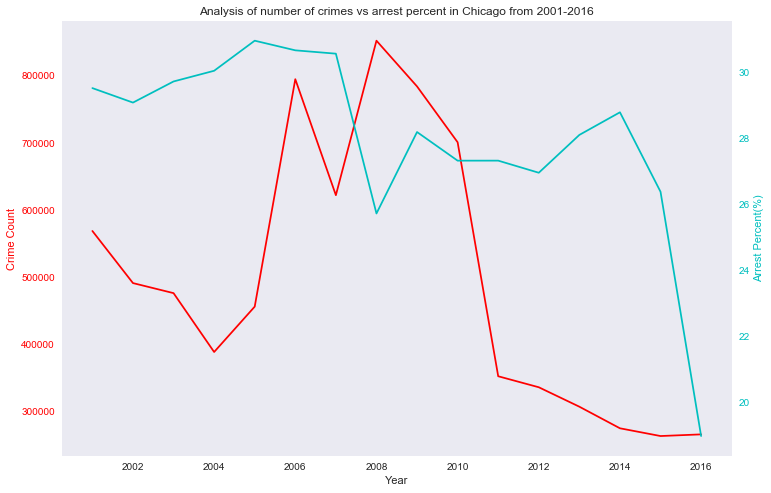

In [66]:
pylab.rcParams['figure.figsize'] = 12, 8

fig7, ax7 = plt.subplots()

ax7.plot(crimes_by_year_df['Year'], crimes_by_year_df['Crime Count'], 'r-')
ax7.set_xlabel('Year')
ax7.set_ylabel('Crime Count', color='r')
ax7.tick_params('y', colors='r')
ax7.grid(False)

ax8 = ax7.twinx()
ax8.plot(crimes_by_year_df['Year'], crimes_by_year_df['Arrest Percentage'], 'c-')
ax8.set_ylabel('Arrest Percent(%)', color='c')
ax8.tick_params('y', colors='c')
ax8.grid(False)

plt.title('Analysis of number of crimes vs arrest percent in Chicago from 2001-2016')
plt.show()

# Processing data to generate the time series of top 20 crime types in Chicago from 2001-2016

In [71]:
fig8, axes = plt.subplots(10, 2)

In [68]:
crime_type_by_year = []

for year in range(2001,2017):
    
    temp_df_1 = crimes_2001_17[crimes_2001_17['Year'] == year]
    
    for cur_crime_type in crime_type_top20:
        
        temp_df_2 = temp_df_1[temp_df_1['Primary Type']==cur_crime_type]
        crime_type_by_year.append([year, cur_crime_type, temp_df_2.shape[0]])
        

In [69]:
crime_type_by_year_df = pd.DataFrame(data=crime_type_by_year, columns=['Year', 'Crime Type', 'Count'])
crime_type_by_year_df.head()

,Year,Crime Type,Count
0,2001,THEFT,115887
1,2001,BATTERY,108601
2,2001,CRIMINAL DAMAGE,65050
3,2001,NARCOTICS,59900
4,2001,OTHER OFFENSE,35538


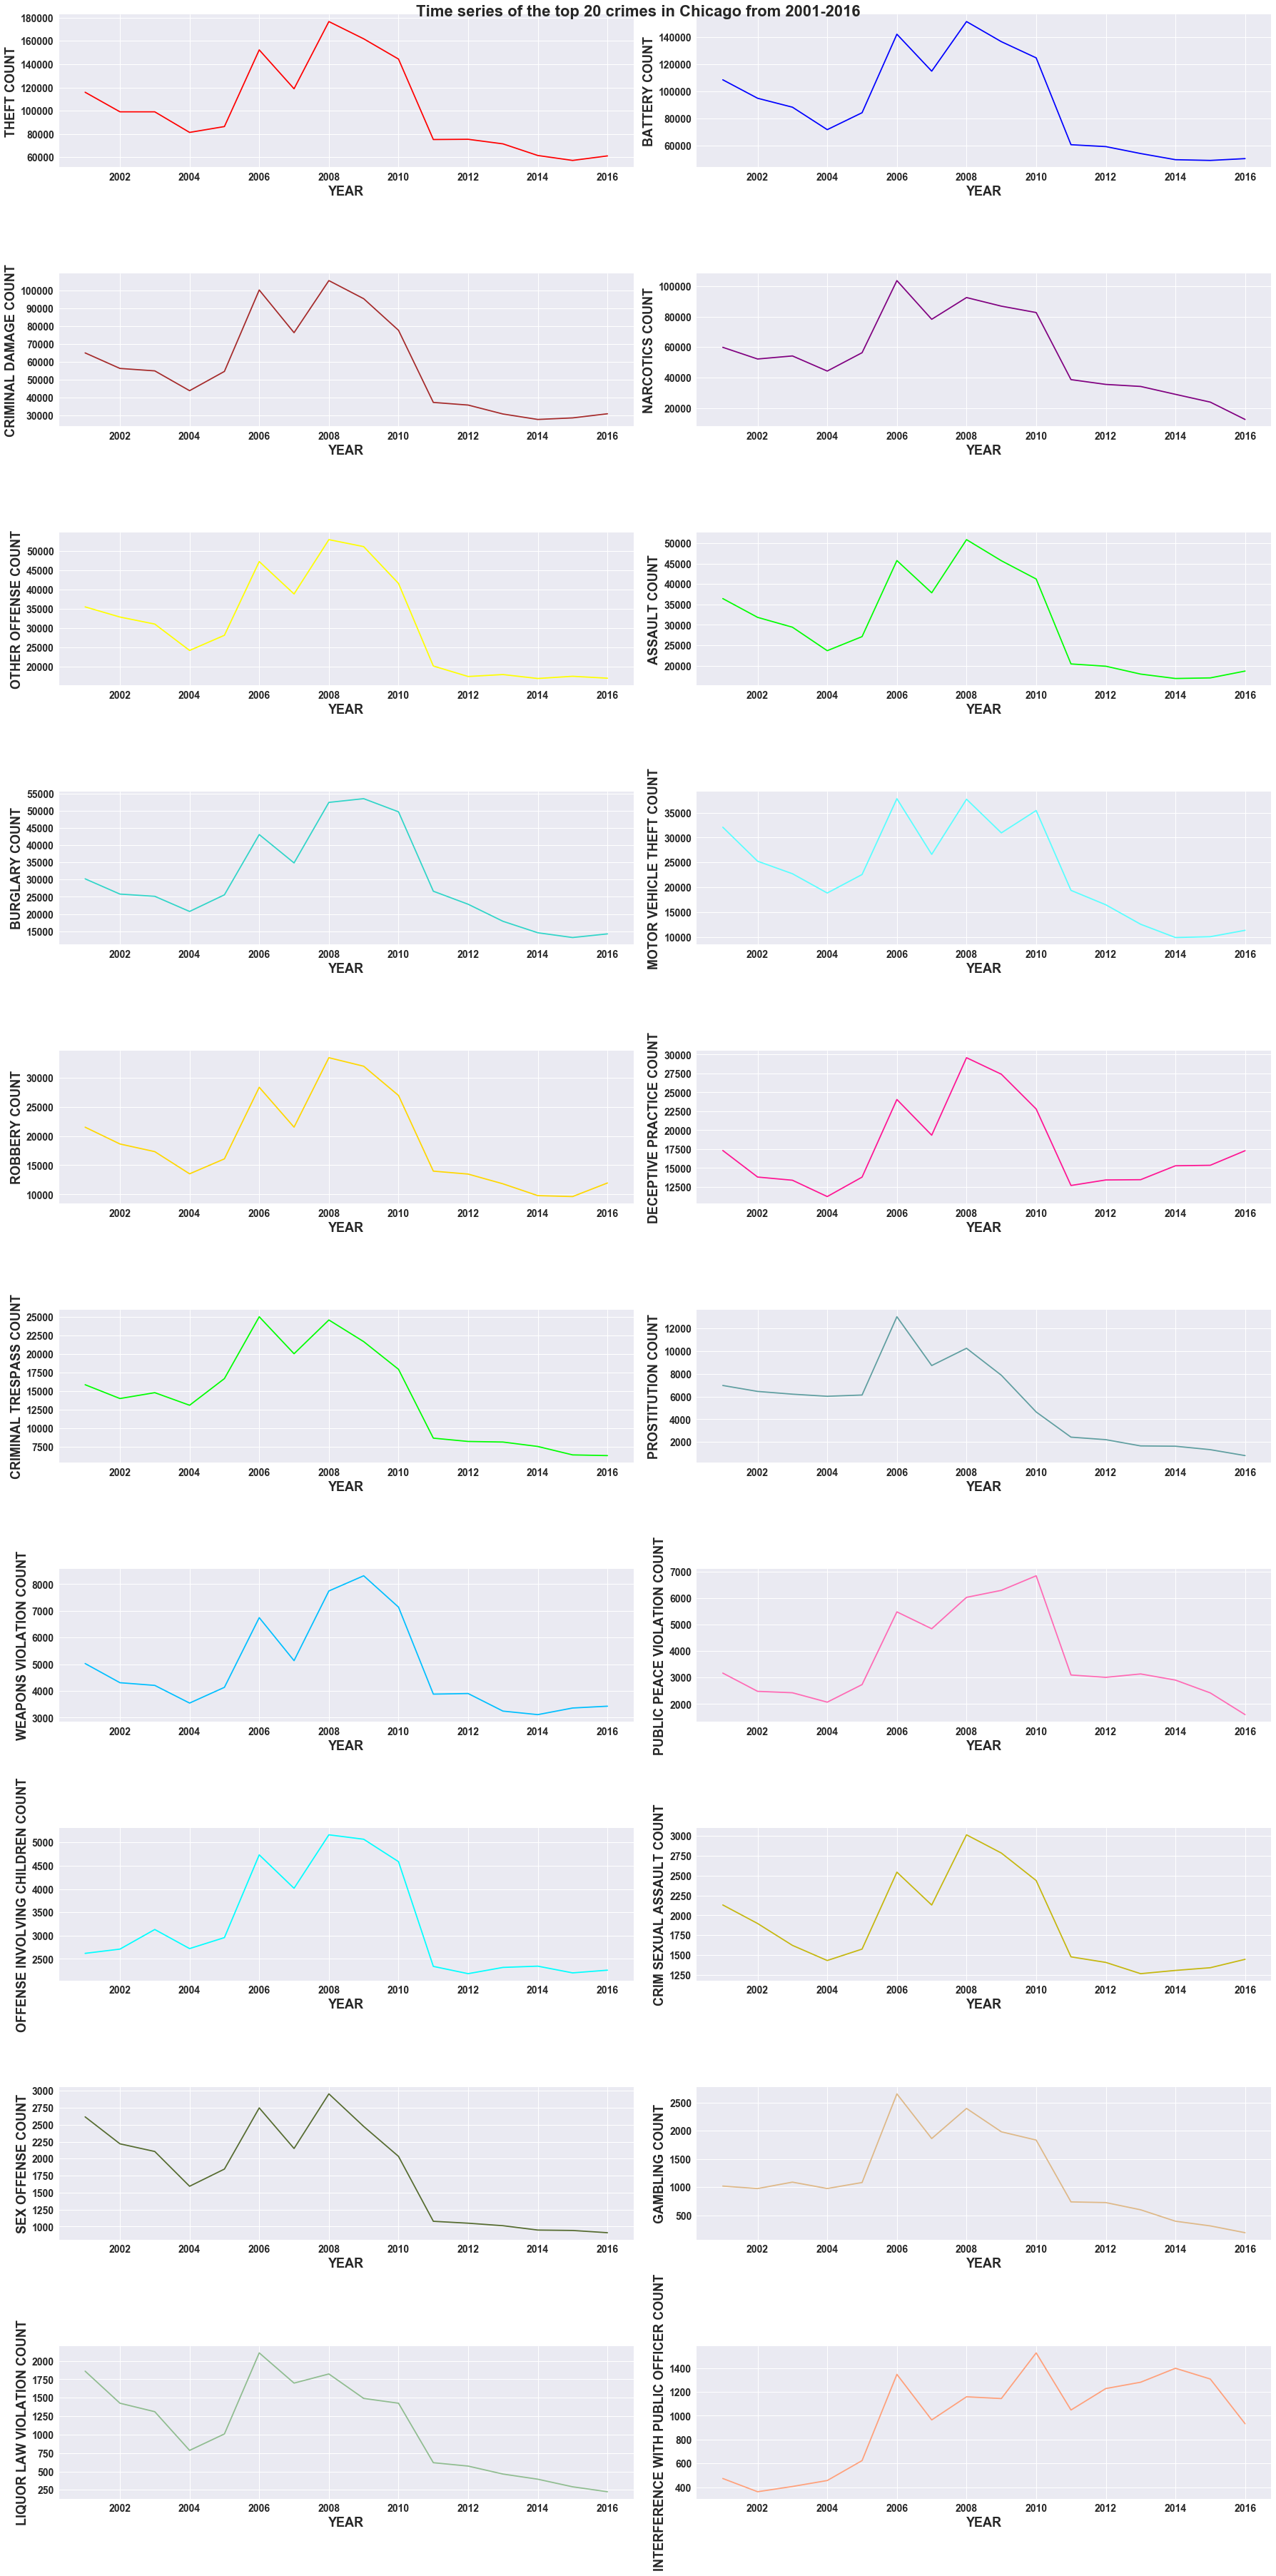

In [72]:
pylab.rcParams['figure.figsize'] = 25, 50
colors_list1 = ['#ff0000', '#0000ff', '#a52a2a', '#800080', '#ffff00', '#00ff00', '#30d5c8', '#58ffff', '#ffd700', '#ff1493']
colors_list2 = ['#00ff00', '#5f9ea0', '#00bfff', '#ff69b4', '#00ffff', '#c5b70e', '#556b2f', '#deb887', '#8fbc8f', '#ffa07a']
colors_list = colors_list1 + colors_list2
cur_crime_count = 0
for cur_row in axes:
    
    for cur_col_in_row in cur_row:
        
        temp_df = crime_type_by_year_df[crime_type_by_year_df['Crime Type']==crime_type_top20[cur_crime_count]]
        #print(temp_df.head())
        cur_col_in_row.plot(temp_df['Year'], temp_df['Count'], color=colors_list[cur_crime_count])
        cur_col_in_row.set_xlabel('YEAR', fontweight='bold', fontsize=18)
        cur_col_in_row.set_ylabel(crime_type_top20[cur_crime_count] + ' COUNT', fontweight='bold', fontsize=18)
        plt.setp(cur_col_in_row.get_xticklabels(), fontsize=14, fontweight='bold')
        plt.setp(cur_col_in_row.get_yticklabels(), fontsize=14, fontweight='bold')
        cur_crime_count += 1
    
fig8.suptitle('Time series of the top 20 crimes in Chicago from 2001-2016', y=1, fontsize=22, fontweight='bold')
fig8.tight_layout()
plt.show()

# Processing data to generate the time series of top 20 crime locations in Chicago from 2001-2016

In [73]:
fig9, axes2 = plt.subplots(10, 2)

In [74]:
crime_location_by_year = []

for year in range(2001,2017):
    
    temp_df_1 = crimes_2001_17[crimes_2001_17['Year'] == year]
    
    for cur_crime_location_type in crime_location_type_top20:
        
        temp_df_2 = temp_df_1[temp_df_1['Location Description']==cur_crime_location_type]
        crime_location_by_year.append([year, cur_crime_location_type, temp_df_2.shape[0]])
        

In [75]:
crime_location_by_year_df = pd.DataFrame(data=crime_location_by_year, columns=['Year', 'Crime Location', 'Count'])
crime_location_by_year_df.head()

,Year,Crime Location,Count
0,2001,STREET,175545
1,2001,RESIDENCE,111318
2,2001,SIDEWALK,33153
3,2001,APARTMENT,33317
4,2001,OTHER,24645


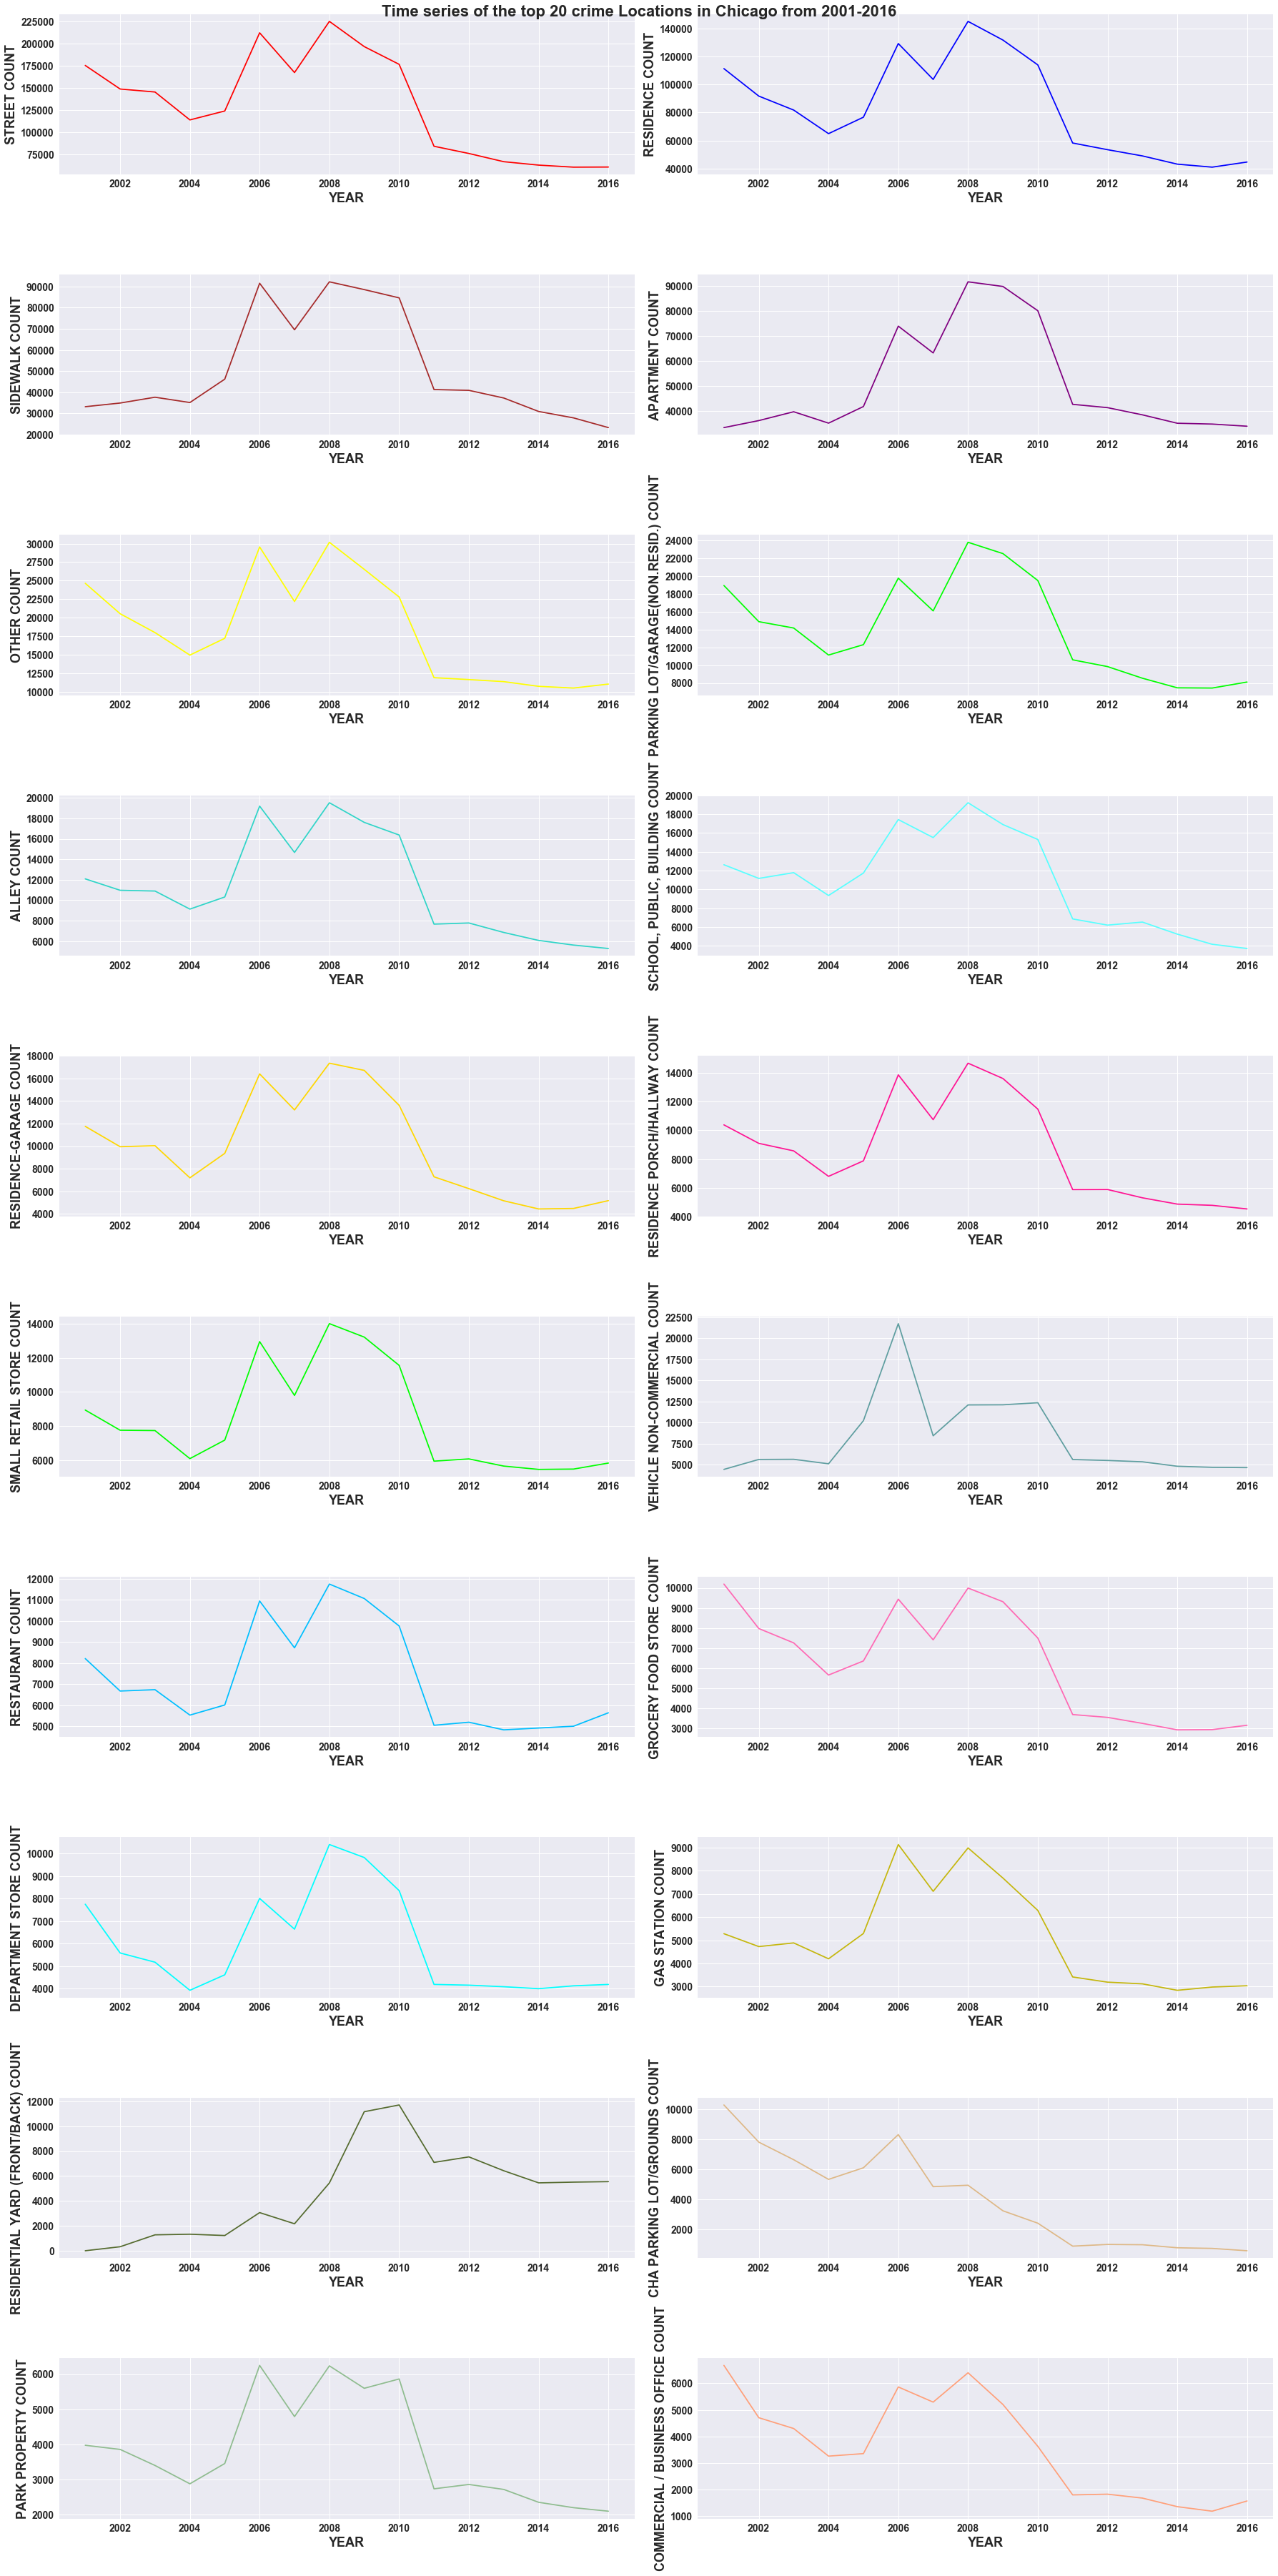

In [76]:
cur_crime_location_count = 0
for cur_row in axes2:
    
    for cur_col_in_row in cur_row:
        
        temp_df = crime_location_by_year_df[crime_location_by_year_df['Crime Location']==crime_location_type_top20[cur_crime_location_count]]
        #print(temp_df.head())
        cur_col_in_row.plot(temp_df['Year'], temp_df['Count'], color=colors_list[cur_crime_location_count])
        cur_col_in_row.set_xlabel('YEAR', fontweight='bold', fontsize=18)
        cur_col_in_row.set_ylabel(crime_location_type_top20[cur_crime_location_count] + ' COUNT', fontweight='bold', fontsize=18)
        plt.setp(cur_col_in_row.get_xticklabels(), fontsize=14, fontweight='bold')
        plt.setp(cur_col_in_row.get_yticklabels(), fontsize=14, fontweight='bold')
        cur_crime_location_count += 1
    
fig9.suptitle('Time series of the top 20 crime Locations in Chicago from 2001-2016', y=1, fontsize=22, fontweight='bold')
fig9.tight_layout()
plt.show()

# Processing data to generate a heatmap to understand the impact of "top 20 crime types"  and "top 20 community areas" on the "number of crimes" in Chicago

In [77]:
crime_counts_by_area_crimeType = process_data_for_heatmap('Primary Type', 'Community Area Name', crime_type_top20, crime_community_area)

In [78]:
crime_counts_by_area_crimeType_df = pd.DataFrame(data=crime_counts_by_area_crimeType, columns=['Crime Type', 'Community Area', 'Count'])
crime_counts_by_area_crimeType_df.head()

,Crime Type,Community Area,Count
0,THEFT,Austin,59877
1,THEFT,South Shore,37250
2,THEFT,Near North Side,96280
3,THEFT,Humboldt Park,29808
4,THEFT,West Englewood,29573


In [79]:
crime_counts_by_area_crimeType_df = crime_counts_by_area_crimeType_df.pivot('Community Area', 'Crime Type', 'Count')
crime_counts_by_area_crimeType_df.head()

Crime Type,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,INTERFERENCE WITH PUBLIC OFFICER,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
Community Area,,,,,,,,,,,,,,,,,,,,
Auburn Gresham,14342,43342,15049,877,23122,5865,5448,688,575,257,9582,24885,1953,13793,1320,1300,9871,565,30514,2794
Austin,27112,91430,19280,1838,40693,8658,10362,3403,1605,716,17225,113636,2740,27700,9454,2898,19777,1135,59877,5509
Chatham,9903,28464,9852,622,15650,3922,6265,268,303,138,8612,14320,1018,9509,486,710,8717,367,31647,1526
Chicago Lawn,12110,36020,14211,781,22894,4037,4561,614,468,321,10004,23061,1516,11437,782,1958,9328,676,26876,2380
East Garfield Park,8928,28591,4464,458,11295,2513,3391,630,413,166,5613,33619,670,6456,4461,800,5601,335,16991,1665


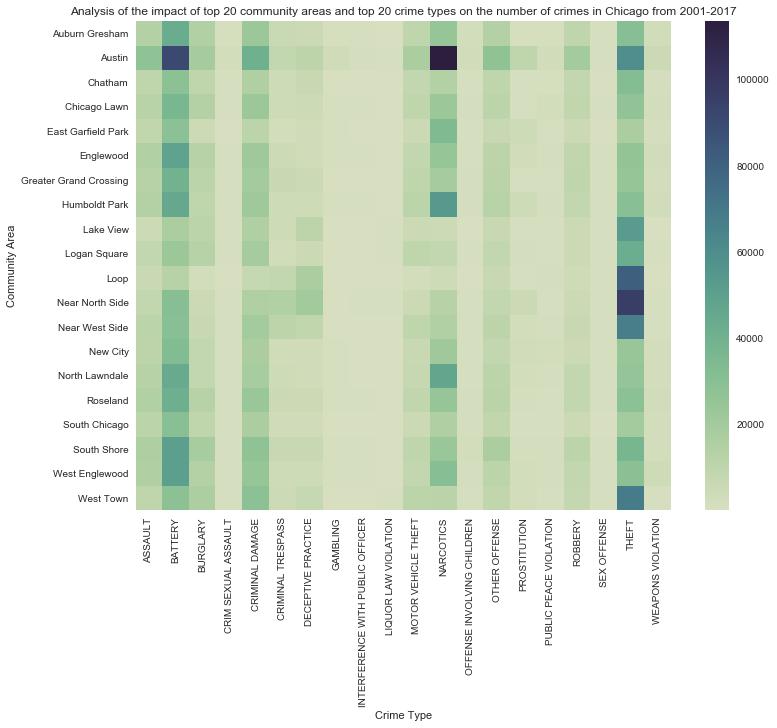

In [80]:
pylab.rcParams['figure.figsize'] = 12, 9
generate_heatmap(crime_counts_by_area_crimeType_df, 'Analysis of the impact of top 20 community areas and top 20 crime types on the number of crimes in Chicago from 2001-2017', sns.cubehelix_palette(10, start=.5, rot=-.75, as_cmap=True))

# Processing data to generate a heatmap to understand the impact of "top 20 community areas"  and "top 20 crime locations" on the "number of crimes" in Chicago

In [81]:
crime_counts_by_area_crimeLocation = process_data_for_heatmap('Location Description', 'Community Area Name', crime_location_type_top20, crime_community_area)

In [82]:
crime_counts_by_area_crimeLocation_df = pd.DataFrame(data=crime_counts_by_area_crimeLocation, columns=['Crime Location', 'Community Area', 'Count'])
crime_counts_by_area_crimeLocation_df.head()

,Crime Location,Community Area,Count
0,STREET,Austin,121574
1,STREET,South Shore,56093
2,STREET,Near North Side,46298
3,STREET,Humboldt Park,64539
4,STREET,West Englewood,59195


In [83]:
crime_counts_by_area_crimeLocation_df = crime_counts_by_area_crimeLocation_df.pivot('Community Area', 'Crime Location', 'Count')
crime_counts_by_area_crimeLocation_df.head()

Crime Location,ALLEY,APARTMENT,CHA PARKING LOT/GROUNDS,COMMERCIAL / BUSINESS OFFICE,DEPARTMENT STORE,GAS STATION,GROCERY FOOD STORE,OTHER,PARK PROPERTY,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,"SCHOOL, PUBLIC, BUILDING",SIDEWALK,SMALL RETAIL STORE,STREET,VEHICLE NON-COMMERCIAL
Community Area,,,,,,,,,,,,,,,,,,,,
Auburn Gresham,4696,26816,85,424,495,3490,1508,6056,780,4450,46311,3707,4158,2297,1772,3872,21058,2644,56979,2643
Austin,16460,56949,83,1348,5950,5643,3583,11602,1895,9460,66563,10084,5451,4936,3425,7340,93143,5214,121574,9832
Chatham,3114,25136,30,601,6512,2414,2097,4966,422,6382,24851,2168,2476,1283,1732,2386,13578,3103,35840,1508
Chicago Lawn,5153,20566,9,614,1800,2423,1278,5031,1183,4149,41122,2994,5314,2336,1587,2370,22399,3102,48097,4045
East Garfield Park,3996,14784,813,306,52,1651,599,5002,1808,2192,16294,2451,681,1429,483,5271,26448,481,38072,2049


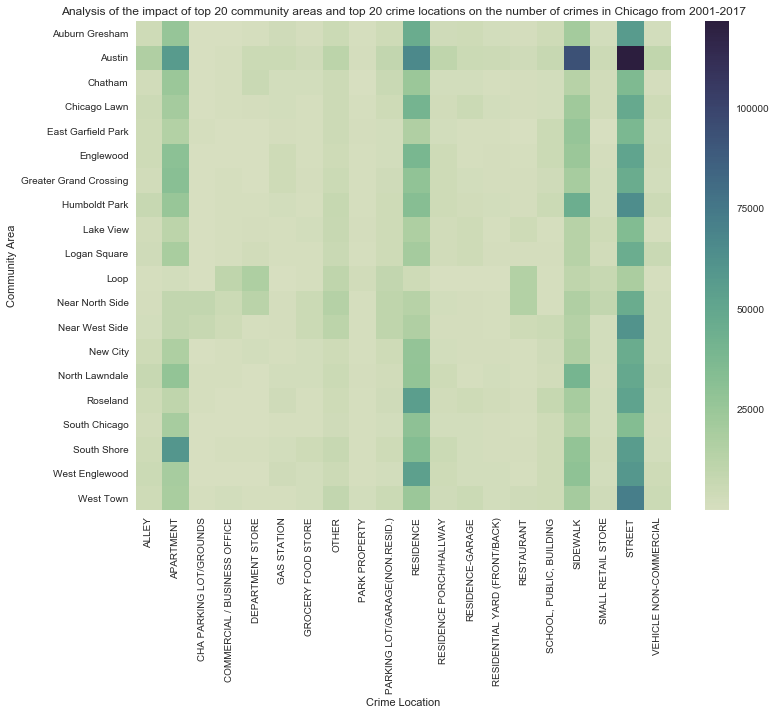

In [84]:
generate_heatmap(crime_counts_by_area_crimeLocation_df, 'Analysis of the impact of top 20 community areas and top 20 crime locations on the number of crimes in Chicago from 2001-2017', sns.cubehelix_palette(10, start=.5, rot=-.75, as_cmap=True))

# Processing data to interpret the number of crimes committed based on the "Hour of the Day" in Chicago from 2001-2017


In [85]:
crime_counts_by_hour = crimes_2001_17['Hour'].value_counts()
crime_counts_by_hour = crime_counts_by_hour.to_dict()
crime_counts_by_hour = sorted(crime_counts_by_hour.items(), key=lambda x:x[1], reverse=True)

In [86]:
unzip_crime_hour_data = zip(*crime_counts_by_hour)

In [87]:
crime_hour = unzip_crime_hour_data[0]
crime_hour_count = unzip_crime_hour_data[1]
arrests_count_based_on_hour = get_arrest_counts('Hour', crime_hour)

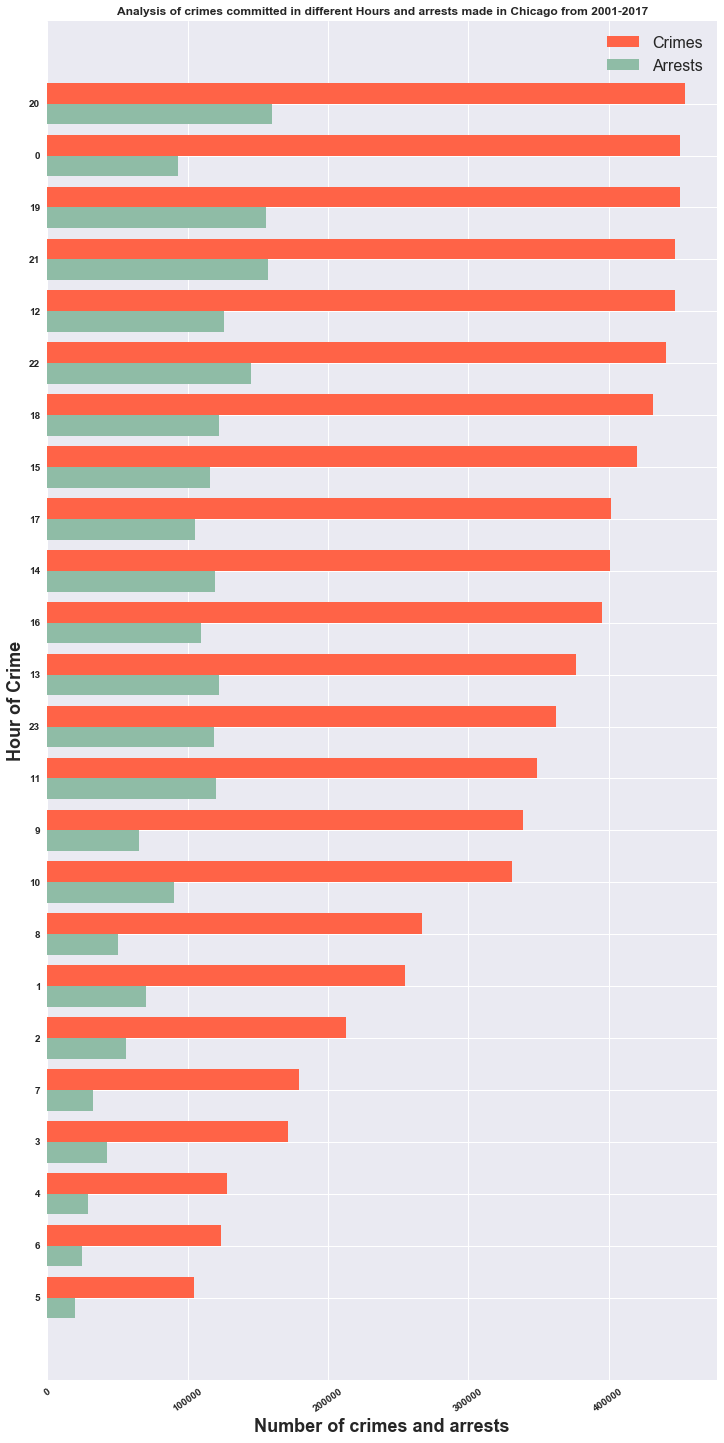

In [88]:
pylab.rcParams['figure.figsize'] = 12, 25
fig10, ax9 = plt.subplots()
generate_horizontalBarChart(ax9, np.arange(len(crime_hour)), crime_hour_count, '#ff6347', crime_hour, 'Number of crimes and arrests', 'Hour of Crime', 'Analysis of crimes committed in different Hours and arrests made in Chicago from 2001-2017', 35, arrests_count_based_on_hour, '#8fbca6')

# Processing data to generate a heatmap to understand the impact of "top 20 crime types"  and "Hour of crime" on the "number of crimes" in Chicago


In [89]:
crime_counts_by_hour_crimeType = process_data_for_heatmap('Primary Type', 'Hour', crime_type_top20, crime_hour)

In [90]:
crime_counts_by_hour_crimeType_df = pd.DataFrame(data=crime_counts_by_hour_crimeType, columns=['Crime Type', 'Hour', 'Count'])
crime_counts_by_hour_crimeType_df.head()

,Crime Type,Hour,Count
0,THEFT,20,76036
1,THEFT,0,100402
2,THEFT,19,84128
3,THEFT,21,68270
4,THEFT,12,114725


In [91]:
crime_counts_by_hour_crimeType_df = crime_counts_by_hour_crimeType_df.pivot('Crime Type', 'Hour', 'Count')
crime_counts_by_hour_crimeType_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Crime Type,,,,,,,,,,,,,,,,,,,,,
ASSAULT,15773,12529,10419,7488,5479,4327,5019,8654,16376,20612,...,30820,31936,29052,28398,28553,28029,27423,25482,22549,19190
BATTERY,71752,69642,62170,50535,35157,23437,19511,24288,37579,44441,...,73912,79831,71260,71112,74772,77445,80208,82538,82786,77999
BURGLARY,21150,10560,9829,9031,8630,10243,15389,25336,31916,28336,...,22745,23041,21980,23081,23084,19643,17964,17463,18192,13868
CRIM SEXUAL ASSAULT,3882,1788,1822,1784,1478,1073,768,651,726,771,...,819,1055,1039,1038,1055,1093,1311,1357,1701,1747
CRIMINAL DAMAGE,70305,39729,33872,28156,21664,17048,17487,23332,29862,30843,...,32939,38742,40654,47221,52747,52457,55681,58947,63384,50093


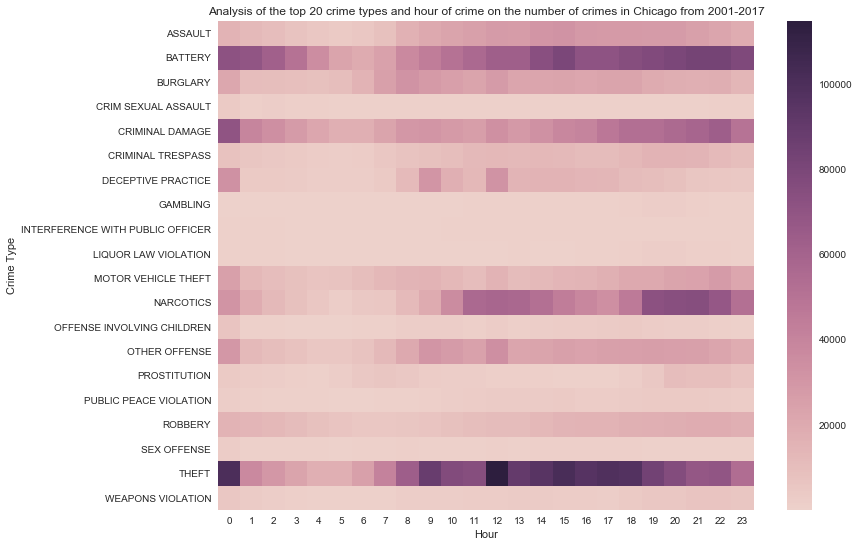

In [92]:
pylab.rcParams['figure.figsize'] = 12, 9
generate_heatmap(crime_counts_by_hour_crimeType_df, 'Analysis of the top 20 crime types and hour of crime on the number of crimes in Chicago from 2001-2017', sns.cubehelix_palette(as_cmap=True))

# Processing data to generate a heatmap to understand the impact of "top 20 crime locations"  and "hour of crime" on the "number of crimes" in Chicago


In [93]:
crime_counts_by_hour_crimeLocation = process_data_for_heatmap('Location Description', 'Hour', crime_location_type_top20, crime_hour)

In [94]:
crime_counts_by_hour_crimeLocation_df = pd.DataFrame(data=crime_counts_by_hour_crimeLocation, columns=['Crime Location', 'Hour', 'Count'])
crime_counts_by_hour_crimeLocation_df.head()

,Crime Location,Hour,Count
0,STREET,20,141727
1,STREET,0,138627
2,STREET,19,127719
3,STREET,21,148191
4,STREET,12,88024


In [95]:
crime_counts_by_hour_crimeLocation_df = crime_counts_by_hour_crimeLocation_df.pivot('Crime Location', 'Hour', 'Count')
crime_counts_by_hour_crimeLocation_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Crime Location,,,,,,,,,,,,,,,,,,,,,
ALLEY,8469,6105,5082,4039,2779,2064,1915,2445,3594,4281,...,8986,9504,9279,9164,10524,12863,12854,12877,12246,9976
APARTMENT,46998,31773,27115,22665,18175,16105,18328,25394,33923,39880,...,33851,37056,37755,38242,39733,39493,40459,41195,41619,39095
CHA PARKING LOT/GROUNDS,2365,1584,1080,879,526,426,660,1311,1836,2499,...,3179,2826,2687,3006,3894,4953,5031,5155,4408,3342
COMMERCIAL / BUSINESS OFFICE,3129,715,698,609,537,517,647,1236,2857,4922,...,3541,3857,3932,4895,3328,2190,1627,1247,1115,934
DEPARTMENT STORE,781,226,211,169,160,149,159,291,804,2056,...,9560,10719,11298,10450,8873,6968,4683,2141,755,346


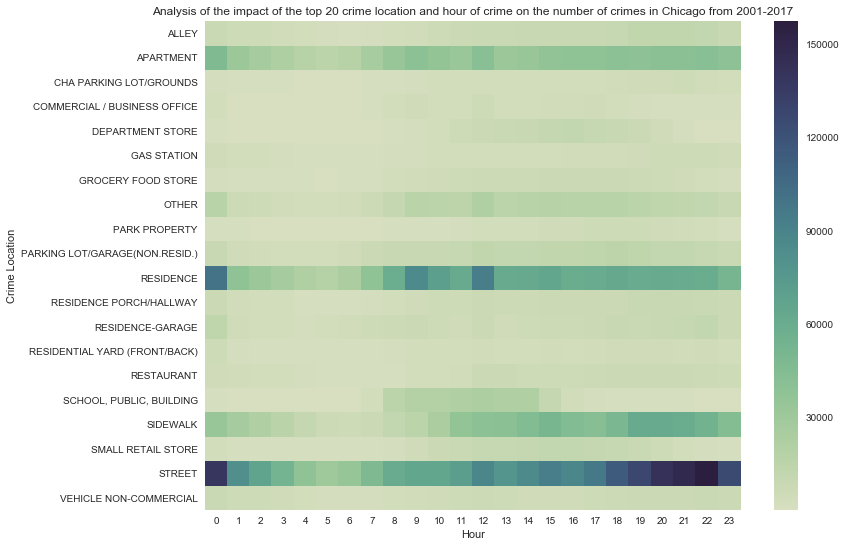

In [96]:
generate_heatmap(crime_counts_by_hour_crimeLocation_df, 'Analysis of the impact of the top 20 crime location and hour of crime on the number of crimes in Chicago from 2001-2017', sns.cubehelix_palette(10, start=.5, rot=-.75, as_cmap=True))

# Processing data to generate a heatmap to understand the impact of "top 20 community areas"  and "hour of crime" on the "number of crimes" in Chicago


In [97]:
crime_counts_by_hour_communityArea = process_data_for_heatmap('Hour', 'Community Area Name', crime_hour, crime_community_area)

In [100]:
crime_counts_by_hour_communityArea_df = pd.DataFrame(data=crime_counts_by_hour_communityArea, columns=['Hour', 'Community Area', 'Count'])
crime_counts_by_hour_communityArea_df.head()

,Hour,Community Area,Count
0,20,Austin,27070
1,20,South Shore,13816
2,20,Near North Side,12413
3,20,Humboldt Park,13377
4,20,West Englewood,12619


In [101]:
crime_counts_by_hour_communityArea_df = crime_counts_by_hour_communityArea_df.pivot('Community Area', 'Hour', 'Count')
crime_counts_by_hour_communityArea_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Community Area,,,,,,,,,,,,,,,,,,,,,
Auburn Gresham,12232,7121,5606,4458,3301,2758,3267,4741,7007,8765,...,10312,10843,10354,9785,10246,11508,11935,11907,11939,10155
Austin,24669,15151,12035,9577,6897,5534,6623,8832,13149,18946,...,25169,24846,22753,21870,24468,27637,27070,26350,26420,22245
Chatham,8336,4701,3723,3036,2395,2262,2661,3674,5121,6916,...,7635,8409,8028,7857,8042,8496,8580,8340,8219,6801
Chicago Lawn,10248,5785,4868,4078,3240,2606,3054,3897,5619,7428,...,9241,9390,9196,8972,10327,10777,11073,11065,10766,8731
East Garfield Park,6619,4152,3225,2503,1875,1659,2268,3233,4743,5852,...,7182,7468,6831,6436,7132,8249,8310,7587,7462,6083


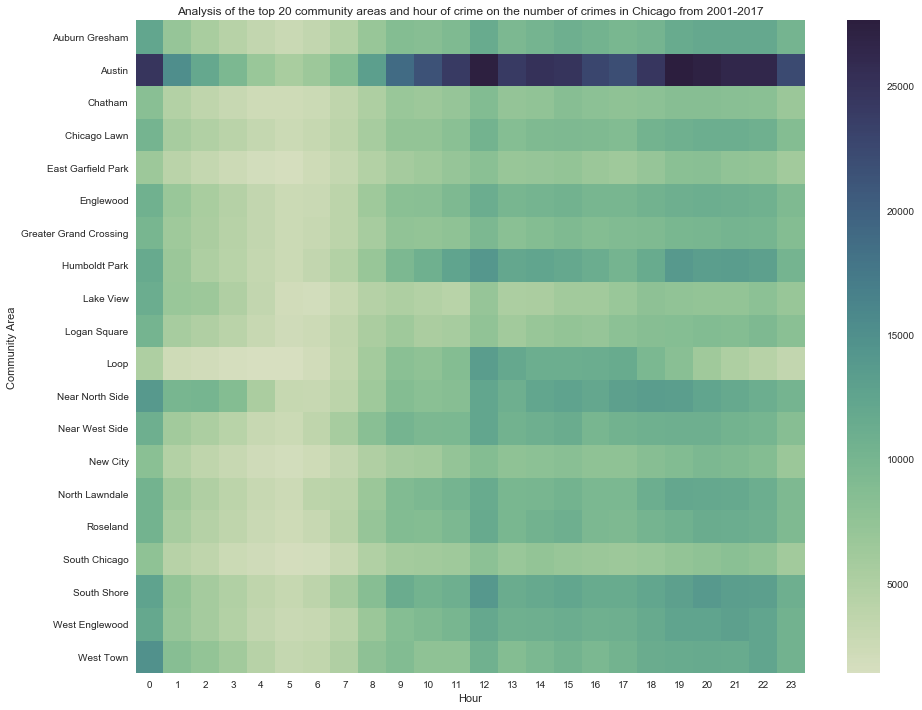

In [102]:
pylab.rcParams['figure.figsize'] = 15, 12
generate_heatmap(crime_counts_by_hour_communityArea_df, 'Analysis of the top 20 community areas and hour of crime on the number of crimes in Chicago from 2001-2017', sns.cubehelix_palette(10, start=.5, rot=-.75, as_cmap=True))

# In this section we will be focusing on sexual crimes (viz. prostitution, sexual assault and sexual offense)

In [103]:
sexual_crimes_list = ['PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE']

# Processing data to understand how the sexual crimes have varied over different hours of the day 

In [104]:
prostitution_counts_by_hour = []
sexual_assaults_counts_by_hour = []
sexual_offense_counts_by_hour = []

for cur_hour in range(0,24):
    
    temp_df = crimes_2001_17[crimes_2001_17['Hour']==cur_hour]
    
    for sexual_crime in sexual_crimes_list:
        
        temp_df_2 = temp_df[temp_df['Primary Type']==sexual_crime]
        
        if sexual_crime == 'PROSTITUTION':
            prostitution_counts_by_hour.append(temp_df_2.shape[0])
        elif sexual_crime == 'CRIM SEXUAL ASSAULT':
            sexual_assaults_counts_by_hour.append(temp_df_2.shape[0])
        else:
            sexual_offense_counts_by_hour.append(temp_df_2.shape[0])
            

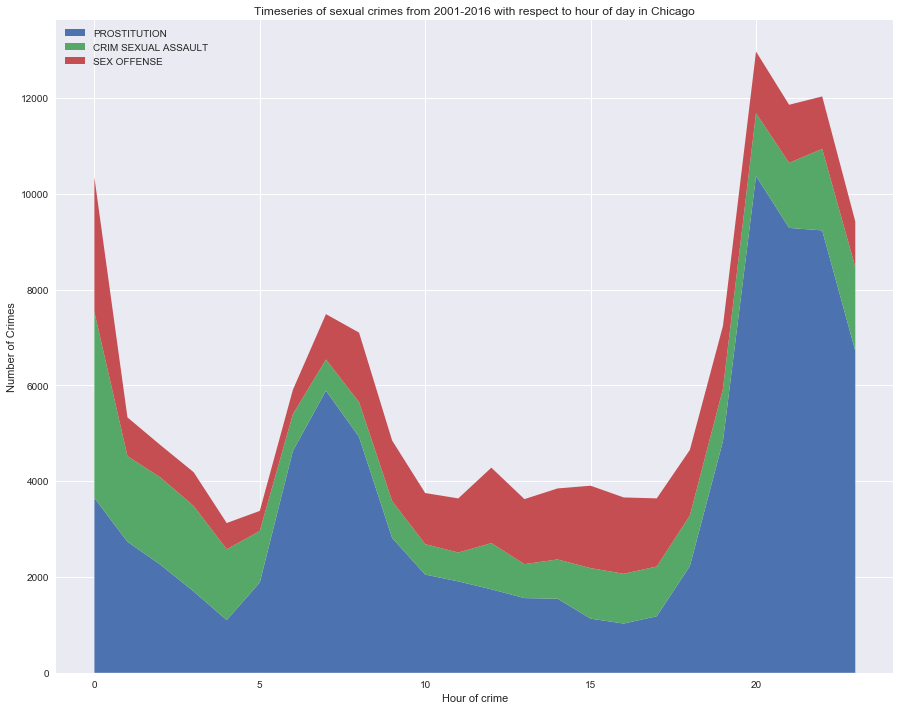

In [105]:
fig11, ax10 = plt.subplots()
ax10.stackplot(list(range(0,24)), prostitution_counts_by_hour, sexual_assaults_counts_by_hour, sexual_offense_counts_by_hour, labels=sexual_crimes_list)
ax10.legend(loc=2)
ax10.set_xlabel('Hour of crime')
ax10.set_ylabel('Number of Crimes')
ax10.set_title('Timeseries of sexual crimes from 2001-2016 with respect to hour of day in Chicago')
plt.show()

# Processing data to understand how the number of sexual crimes and arrest percentage has varied over the years in Chicago

In [106]:
prostitution_counts = []
sexual_assaults_counts = []
sexual_offense_counts = []
prostitution_arrests = []
sexual_assaults_arrests = []
sexual_offense_arrests = []
for cur_year in range(2001,2017):
    temp_df = crimes_2001_17[crimes_2001_17['Year']==cur_year]
    for sexual_crime in sexual_crimes_list:
        temp_df_2 = temp_df[temp_df['Primary Type']==sexual_crime]
        arrest_count = temp_df_2['Arrest'].value_counts()[True]
        arrest_percent = float(arrest_count*100)/temp_df_2.shape[0]
        if sexual_crime == 'PROSTITUTION':
            prostitution_counts.append(temp_df_2.shape[0])
            prostitution_arrests.append(arrest_percent)
        elif sexual_crime == 'CRIM SEXUAL ASSAULT':
            sexual_assaults_counts.append(temp_df_2.shape[0])
            sexual_assaults_arrests.append(arrest_percent)
        else:
            sexual_offense_counts.append(temp_df_2.shape[0])
            sexual_offense_arrests.append(arrest_percent)
          

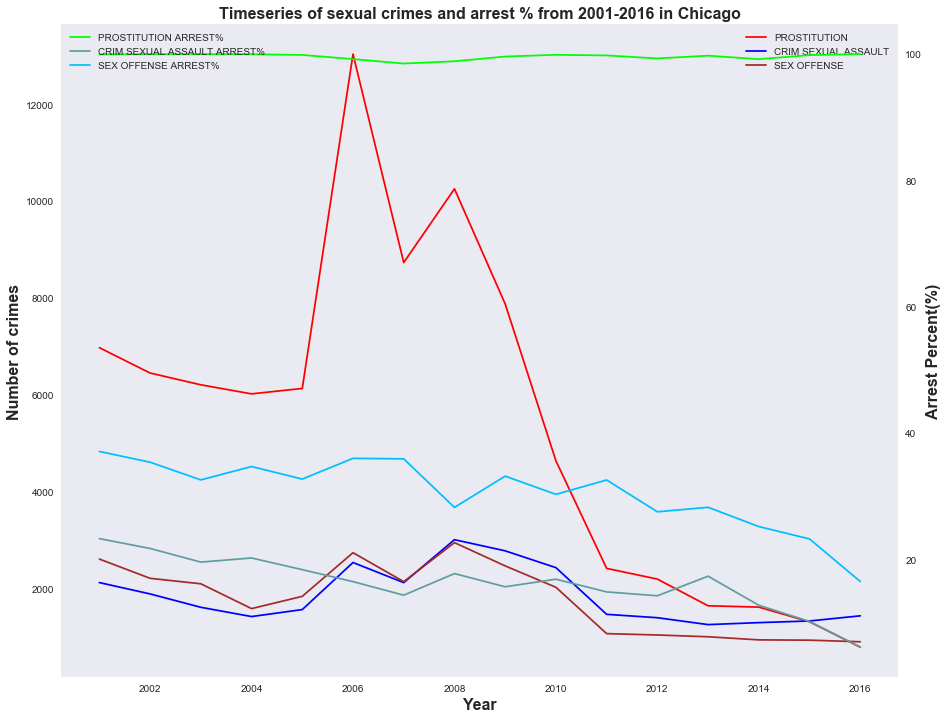

In [107]:
fig12, ax11 = plt.subplots()

crime_years = list(range(2001,2017))
sexual_crimes_count = [prostitution_counts, sexual_assaults_counts, sexual_offense_counts]
sexual_crimes_arrest_count = [prostitution_arrests, sexual_assaults_arrests, sexual_offense_arrests]

ax11.set_xlabel('Year', fontweight='bold', fontsize=16)
ax11.set_ylabel('Number of crimes', fontweight='bold', fontsize=16)
ax11.set_title('Timeseries of sexual crimes and arrest % from 2001-2016 in Chicago', fontweight='bold', fontsize=16)

ax12 = ax11.twinx()

for cur_index,sexual_crime in enumerate(sexual_crimes_list):
    ax11.plot(crime_years, sexual_crimes_count[cur_index], label=sexual_crime, color=colors_list1[cur_index])
    ax12.plot(crime_years, sexual_crimes_arrest_count[cur_index], label=sexual_crime+' ARREST%', color=colors_list2[cur_index])
    
ax12.set_ylabel('Arrest Percent(%)', fontweight='bold', fontsize=16)

ax11.legend(loc=1)
ax12.legend(loc=2)

ax11.grid(False)
ax12.grid(False)

plt.show()

# Processing data for sexual crimes forecasting

In [172]:
prostitution_unfiltered = crimes_2001_17['Primary Type'] == 'PROSTITUTION'
sexual_assault_unfitered = crimes_2001_17['Primary Type'] == 'CRIM SEXUAL ASSAULT'
sexual_offense_unfiltered = crimes_2001_17['Primary Type'] == 'SEX OFFENSE'
sexual_crimes_df = crimes_2001_17[prostitution_unfiltered | sexual_assault_unfitered | sexual_offense_unfiltered]
sexual_crimes_df['Primary Type'].value_counts()

PROSTITUTION           86401
CRIM SEXUAL ASSAULT    29868
SEX OFFENSE            28707
Name: Primary Type, dtype: int64

In [173]:
#The year 2017 has data only for the month of January, so discarding the records of 2017
sexual_crimes_df = sexual_crimes_df[sexual_crimes_df['Year'] != 2017]
sexual_crimes_df['Primary Type'].value_counts()

PROSTITUTION           86369
CRIM SEXUAL ASSAULT    29804
SEX OFFENSE            28687
Name: Primary Type, dtype: int64

In [177]:
sexual_crimes_df['Date Time'] = pd.to_datetime(sexual_crimes_df['Date'], format='%m/%d/%Y %I:%M:%S %p', infer_datetime_format=True)

In [180]:
sexual_crimes_df['Number of Crimes'] = 1

In [184]:
sexual_crimes_df.sort_values('Date Time', inplace=True)

In [188]:
sexual_crimes_df = sexual_crimes_df[['Date Time', 'Number of Crimes']]
sexual_crimes_df.head()

,Date Time,Number of Crimes
834674,2001-01-01,1
834653,2001-01-01,1
834652,2001-01-01,1
834646,2001-01-01,1
834551,2001-01-01,1


In [198]:
sexual_crimes_df = sexual_crimes_df.resample('D', on='Date Time').sum()

In [200]:
sexual_crimes_df = sexual_crimes_df.dropna()

In [202]:
sexual_crimes_df.head()

,Number of Crimes
Date Time,
2001-01-01,184.0
2001-01-02,34.0
2001-01-03,55.0
2001-01-04,43.0
2001-01-05,43.0


In [203]:
sexual_crimes_df.reset_index(inplace=True)
sexual_crimes_df.head()

,Date Time,Number of Crimes
0,2001-01-01,184.0
1,2001-01-02,34.0
2,2001-01-03,55.0
3,2001-01-04,43.0
4,2001-01-05,43.0


# Prophet is being used to do the sexual crimes forecasting

In [204]:
from fbprophet import Prophet

In [207]:
sexual_crimes_df.rename(columns={'Date Time':'ds', 'Number of Crimes':'y'}, inplace=True)
sexual_crimes_df.head()

/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,ds,y
0,2001-01-01,184.0
1,2001-01-02,34.0
2,2001-01-03,55.0
3,2001-01-04,43.0
4,2001-01-05,43.0


In [230]:
sexual_crimes_forecast_model = Prophet()
sexual_crimes_forecast_model.fit(sexual_crimes_df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [231]:
future_df = sexual_crimes_forecast_model.make_future_dataframe(periods=365*3)

In [232]:
forecast_df = sexual_crimes_forecast_model.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6922,2019-12-27,5.040070,-36.289120,44.452494
6923,2019-12-28,1.551082,-39.784055,39.705733
6924,2019-12-29,-2.393373,-42.671123,37.526186
6925,2019-12-30,-1.621842,-42.161126,36.123828
6926,2019-12-31,7.659378,-32.892144,45.109446


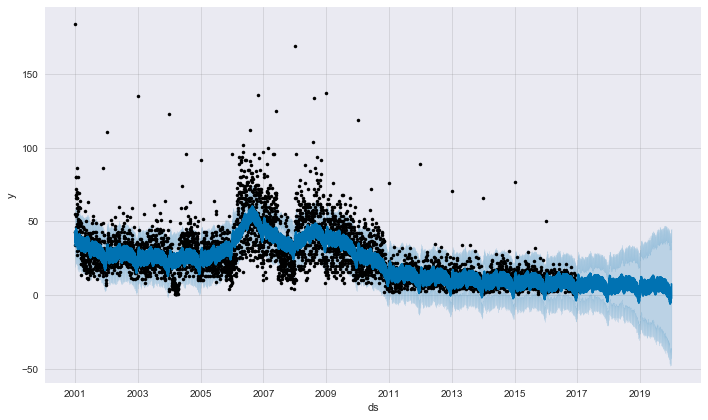

In [233]:
sexual_crimes_forecast_model.plot(forecast_df)

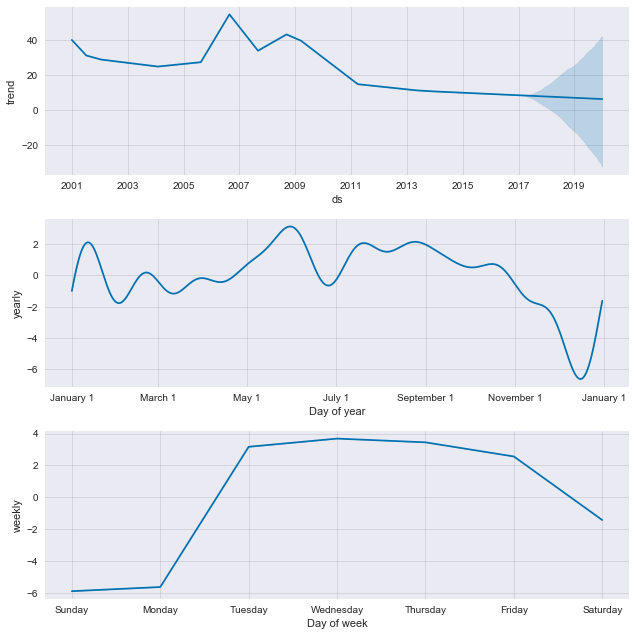

In [234]:
sexual_crimes_forecast_model.plot_components(forecast_df)

# Processing data to build a machine learning model to predict whether arrests will be made in the case of sexual crimes

In [108]:
crimes_2001_17_filtered = crimes_2001_17.dropna()

In [109]:
crimes_2001_17_filtered.shape

(7145126, 27)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [111]:
crimes_2001_17_filtered['Arrest'].value_counts()

False    5127144
True     2017982
Name: Arrest, dtype: int64

In [112]:
crimes_2001_17_filtered['Primary Type'].value_counts()

THEFT                                1476336
BATTERY                              1298224
CRIMINAL DAMAGE                       835271
NARCOTICS                             796050
OTHER OFFENSE                         440868
ASSAULT                               432896
BURGLARY                              430571
MOTOR VEHICLE THEFT                   328760
ROBBERY                               271450
DECEPTIVE PRACTICE                    247700
CRIMINAL TRESPASS                     207719
PROSTITUTION                           76768
WEAPONS VIOLATION                      70352
PUBLIC PEACE VIOLATION                 54362
OFFENSE INVOLVING CHILDREN             45568
CRIM SEXUAL ASSAULT                    25689
SEX OFFENSE                            24301
GAMBLING                               17455
LIQUOR LAW VIOLATION                   15115
INTERFERENCE WITH PUBLIC OFFICER       14993
ARSON                                  11493
HOMICIDE                                8344
KIDNAPPING

In [113]:
prostitution = crimes_2001_17_filtered['Primary Type'] == 'PROSTITUTION'
sexual_assault = crimes_2001_17_filtered['Primary Type'] == 'CRIM SEXUAL ASSAULT'
sexual_offense = crimes_2001_17_filtered['Primary Type'] == 'SEX OFFENSE'
sexual_crimes_2001_2017_df = crimes_2001_17_filtered[prostitution | sexual_assault | sexual_offense]
sexual_crimes_2001_2017_df['Primary Type'].value_counts()

PROSTITUTION           76768
CRIM SEXUAL ASSAULT    25689
SEX OFFENSE            24301
Name: Primary Type, dtype: int64

In [114]:
sexual_crimes_2001_2017_df.shape

(126758, 27)

In [115]:
drop_columns = ['ID', 'Case Number', 'Date', 'IUCR', 'Updated On', 'Location', 'Month_Words', 'FBI Code', 'Community Area Name']
sexual_crimes_2001_2017_df.drop(drop_columns, axis=1, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [116]:
sexual_crimes_2001_2017_df['Arrest'].value_counts()

True     88196
False    38562
Name: Arrest, dtype: int64

In [117]:
columns_to_encode = ['Primary Type', 'Location Description', 'Arrest', 'Domestic', 'DayName', 'Block', 'Description']

for cur_col_to_enc in columns_to_encode:
    sexual_crimes_2001_2017_df[cur_col_to_enc] = LabelEncoder().fit_transform(sexual_crimes_2001_2017_df[cur_col_to_enc])
    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [118]:
sexual_crimes_2001_2017_df['Latitude'] = sexual_crimes_2001_2017_df['Latitude'].astype(float)
sexual_crimes_2001_2017_df['Y Coordinate'] = sexual_crimes_2001_2017_df['Y Coordinate'].astype(float)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [119]:
sexual_crimes_2001_2017_df.dtypes

Block                     int64
Primary Type              int64
Description               int64
Location Description      int64
Arrest                    int64
Domestic                  int64
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
X Coordinate            float64
Y Coordinate            float64
Year                    float64
Latitude                float64
Longitude               float64
Month                     int64
DayName                   int64
Hour                      int64
dtype: object

In [120]:
X = sexual_crimes_2001_2017_df.drop('Arrest', axis=1)
y = sexual_crimes_2001_2017_df['Arrest']

In [121]:
X.shape

(126758, 17)

In [122]:
y.shape

(126758,)

In [123]:
y.value_counts()

1    88196
0    38562
Name: Arrest, dtype: int64

In [124]:
X.columns

Index([u'Block', u'Primary Type', u'Description', u'Location Description',
       u'Domestic', u'Beat', u'District', u'Ward', u'Community Area',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Latitude', u'Longitude',
       u'Month', u'DayName', u'Hour'],
      dtype='object')

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# RandomForestClassifier is being used to classify whether arrests will be made or not

In [126]:
rfc = RandomForestClassifier(random_state=0, n_jobs=-1, oob_score=True, class_weight='balanced') 

param_grid_rfc = { 
    'n_estimators': [100, 250, 500, 750],
    'max_features': ['sqrt', 'log2'],
    'criterion':['gini', 'entropy']
}

In [127]:
X_train.shape

(95068, 17)

In [128]:
y_train.value_counts()

1    66056
0    29012
Name: Arrest, dtype: int64

# Grid search is being used to find the best parameters for the Random forest classifier.

In [129]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv= 5, scoring='roc_auc')
CV_rfc.fit(X_train, y_train.values.ravel())

print('Best Parameters')
print(CV_rfc.best_params_)

y_pred = CV_rfc.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred))
print('roc auc score', roc_auc_score(y_test, y_pred))

Best Parameters
{'max_features': 'sqrt', 'n_estimators': 750, 'criterion': 'entropy'}
('accuracy', 0.94310508046702435)
('precision', 0.986042732182974)
('recall', 0.93175248419150858)
('f1_score', 0.958129165602285)
('roc auc score', 0.95058828398057105)


In [130]:
rfc_best_params = RandomForestClassifier(random_state=0, n_jobs=-1, oob_score=True, class_weight='balanced', max_features='sqrt', n_estimators=750, criterion='entropy')

In [131]:
rfc_best_params.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=750, n_jobs=-1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [132]:
feature_importances = rfc_best_params.feature_importances_
indices = np.argsort(feature_importances)[::-1]

In [133]:
features = list(X_train.columns)
features_list = []
importances_list = []
for f in range(X_train.shape[1]):
    features_list.append(features[indices[f]])
    importances_list.append(feature_importances[indices[f]])
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], feature_importances[indices[f]]))

1. feature Description (0.356511)
2. feature Primary Type (0.171028)
3. feature Location Description (0.137060)
4. feature Latitude (0.036967)
5. feature Y Coordinate (0.036537)
6. feature X Coordinate (0.034566)
7. feature Hour (0.034387)
8. feature Longitude (0.034183)
9. feature Block (0.032990)
10. feature Year (0.028182)
11. feature Month (0.023007)
12. feature Beat (0.020682)
13. feature DayName (0.017835)
14. feature Ward (0.013189)
15. feature Community Area (0.012020)
16. feature District (0.005999)
17. feature Domestic (0.004857)


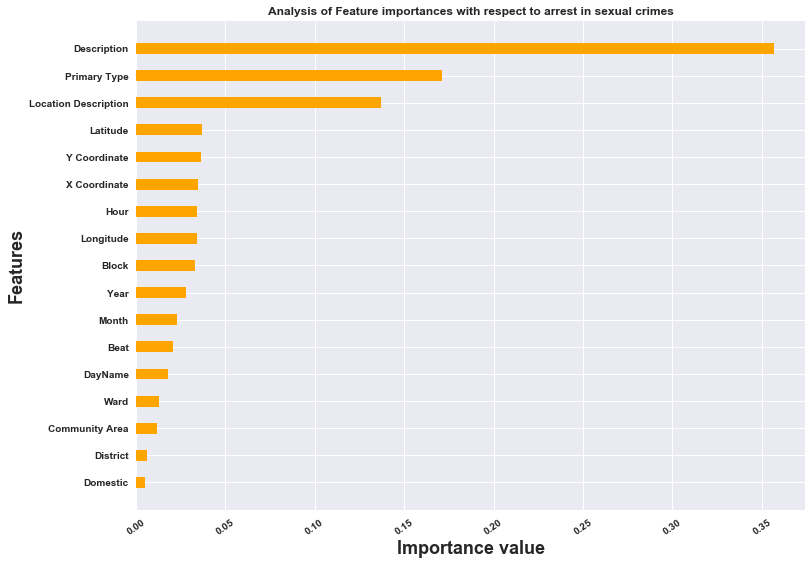

In [134]:
pylab.rcParams['figure.figsize'] = 12, 9
fig13, ax12 = plt.subplots()

generate_horizontalBarChart(ax12, np.arange(len(features_list)), importances_list, 'orange', features_list, 'Importance value', 'Features', 'Analysis of Feature importances with respect to arrest in sexual crimes', 35, grouped=False)

# The following section deals with homicides in Chicago

# Processing data to understand how the number of homicides and arrest percentage has varied over the years in Chicago

In [135]:
homicides_by_year = []
for year in range(2001,2017):
    temp_df_1 = crimes_2001_17[crimes_2001_17['Year']==year]
    temp_df_2 = temp_df_1[temp_df_1['Primary Type'] == 'HOMICIDE']
    if True in temp_df['Arrest'].value_counts():
        arrest_counts = temp_df_2['Arrest'].value_counts()[True]
    else:
        arrest_counts = 0
    
    num_of_homicides = temp_df_2.shape[0]
    arrest_percent = (arrest_counts/float(num_of_homicides))*100
    homicides_by_year.append([year, num_of_homicides, arrest_percent])
    #print('year', year, 'count', num_of_homicides, 'arrest %', arrest_percent)

In [136]:
homicides_by_year_df = pd.DataFrame(data=homicides_by_year, columns=['Year', 'Number of Homicides', 'Arrest Percentage'])
homicides_by_year_df.head()

,Year,Number of Homicides,Arrest Percentage
0,2001,1334,63.268366
1,2002,780,63.589744
2,2003,604,61.258278
3,2004,454,62.995595
4,2005,453,59.602649


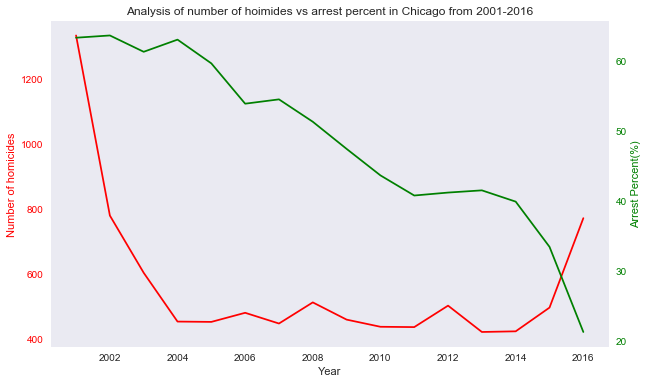

In [137]:
pylab.rcParams['figure.figsize'] = 10, 6

fig14, ax13 = plt.subplots()

ax13.plot(homicides_by_year_df['Year'], homicides_by_year_df['Number of Homicides'], 'r-')
ax13.set_xlabel('Year')
ax13.set_ylabel('Number of homicides', color='r')
ax13.tick_params('y', colors='r')
ax13.grid(False)

ax14 = ax13.twinx()
ax14.plot(homicides_by_year_df['Year'], homicides_by_year_df['Arrest Percentage'], 'g-')
ax14.set_ylabel('Arrest Percent(%)', color='g')
ax14.tick_params('y', colors='g')
ax14.grid(False)

plt.title('Analysis of number of hoimides vs arrest percent in Chicago from 2001-2016')
plt.show()

In [138]:
homicide_unfiltered_df = crimes_2001_17[crimes_2001_17['Primary Type']=='HOMICIDE'] 

# Processing data to generate a heatmap to understand the impact of "top 20 community area"  and "hour of crime" on the "number of homicides" in Chicago

In [139]:
homicide_counts_by_area_hour = process_data_for_heatmap('Hour', 'Community Area Name', crime_hour, crime_community_area, homicide_unfiltered_df)

In [140]:
homicide_counts_by_area_hour_df = pd.DataFrame(data=homicide_counts_by_area_hour, columns=['Hour', 'Community Area', 'Count'])
homicide_counts_by_area_hour_df.head()

,Hour,Community Area,Count
0,20,Austin,37
1,20,South Shore,16
2,20,Near North Side,3
3,20,Humboldt Park,18
4,20,West Englewood,23


In [141]:
homicide_counts_by_area_hour_df = homicide_counts_by_area_hour_df.pivot('Community Area', 'Hour', 'Count')
homicide_counts_by_area_hour_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Community Area,,,,,,,,,,,,,,,,,,,,,
Auburn Gresham,13,19,16,11,15,8,6,8,6,5,...,8,4,11,15,10,14,11,20,12,16
Austin,53,56,44,43,30,23,16,9,11,15,...,22,27,20,32,35,23,37,49,46,44
Chatham,11,13,21,10,15,8,5,7,5,4,...,12,10,15,13,7,10,8,17,6,17
Chicago Lawn,10,16,11,15,10,6,4,7,3,5,...,10,10,10,8,16,8,18,7,15,20
East Garfield Park,14,11,19,10,3,5,13,5,5,5,...,5,4,6,7,9,5,9,10,9,23


In [142]:
from matplotlib.colors import ListedColormap
custom_colors_for_heatmap = ['#add8e6', '#d0c1ef', '#ffdab9', '#f283c9', '#d79f67', '#808000', '#2e8b57', '#00bfff', '#4682b4', '#191970']
custom_cmap = ListedColormap(sns.color_palette(custom_colors_for_heatmap).as_hex())

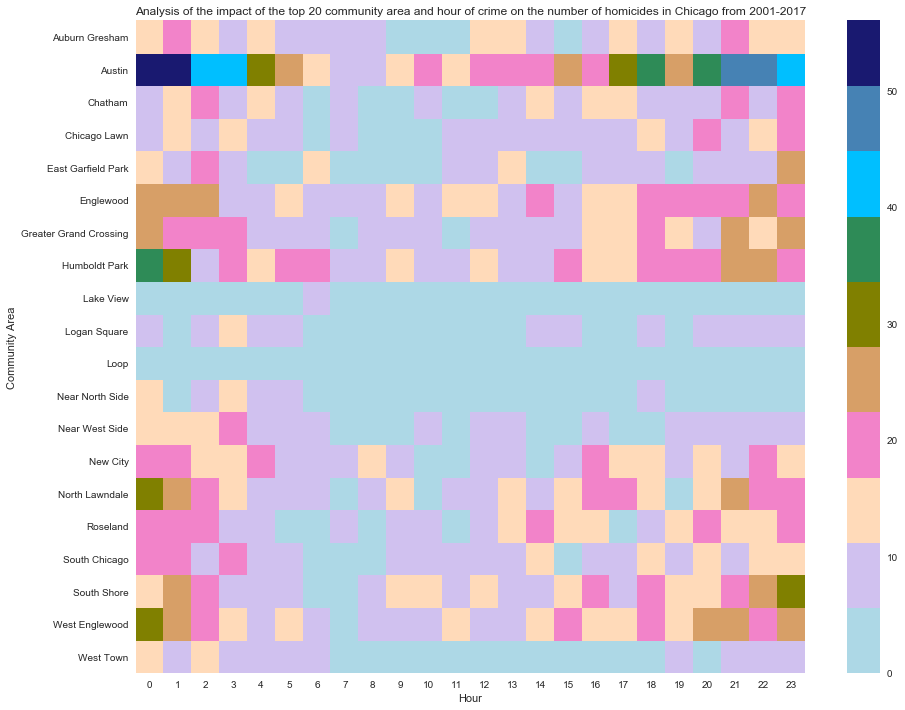

In [143]:
pylab.rcParams['figure.figsize'] = 15, 12
generate_heatmap(homicide_counts_by_area_hour_df, 'Analysis of the impact of the top 20 community area and hour of crime on the number of homicides in Chicago from 2001-2017', custom_cmap)

# Processing data to generate a heatmap to understand the impact of "top 20 community area" and "month of crime" on the "number of homicides" in Chicago

In [144]:
homicide_counts_by_area_month = process_data_for_heatmap('Month_Words', 'Community Area Name', month_names, crime_community_area, homicide_unfiltered_df)

In [145]:
homicide_counts_by_area_month_df = pd.DataFrame(data=homicide_counts_by_area_month, columns=['Month', 'Community Area', 'Count'])
homicide_counts_by_area_month_df.head()

,Month,Community Area,Count
0,January,Austin,53
1,January,South Shore,26
2,January,Near North Side,13
3,January,Humboldt Park,31
4,January,West Englewood,28


In [146]:
homicide_counts_by_area_month_df = homicide_counts_by_area_month_df.pivot('Community Area', 'Month', 'Count')
homicide_counts_by_area_month_df.head()

Month,April,August,December,February,January,July,June,March,May,November,October,September
Community Area,,,,,,,,,,,,
Auburn Gresham,19,34,14,21,10,30,15,19,22,20,27,31
Austin,44,76,64,43,53,68,71,51,65,40,65,62
Chatham,22,22,18,14,18,23,23,12,23,17,23,20
Chicago Lawn,18,22,17,5,19,30,21,18,23,18,26,22
East Garfield Park,16,22,10,12,14,22,19,11,23,23,12,27


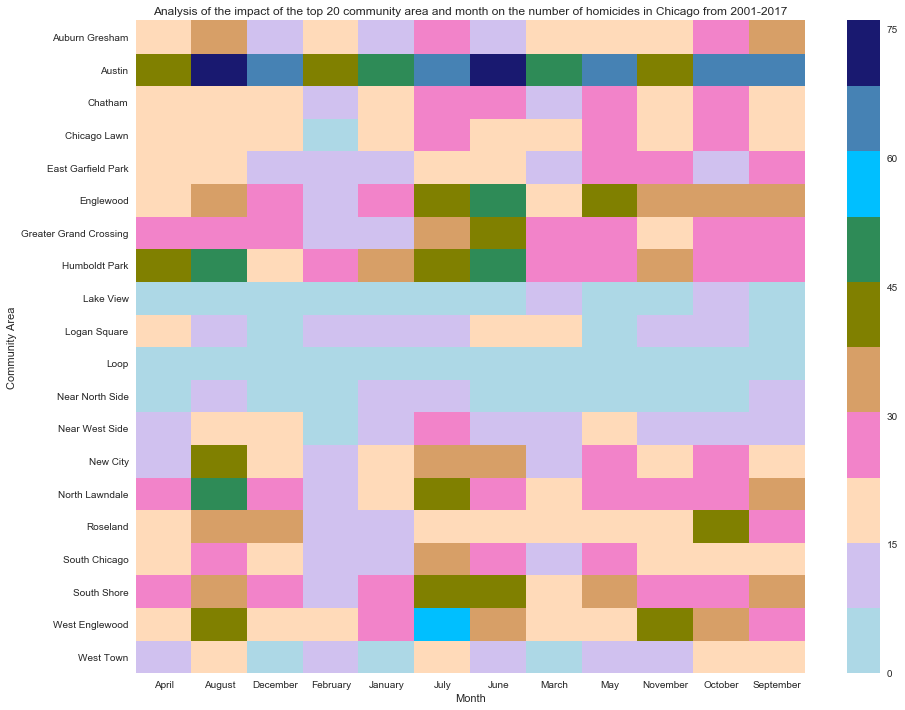

In [147]:
generate_heatmap(homicide_counts_by_area_month_df, 'Analysis of the impact of the top 20 community area and month on the number of homicides in Chicago from 2001-2017', custom_cmap)

# Processing data to generate a heatmap to understand the impact of "top 20 community area" and "day of crime" on the "number of homicides" in Chicago

In [148]:
homicide_counts_by_day_area = process_data_for_heatmap('DayName', 'Community Area Name', day_names, crime_community_area, homicide_unfiltered_df)

In [149]:
homicide_counts_by_day_area_df = pd.DataFrame(data=homicide_counts_by_day_area, columns=['Day', 'Community Area', 'Count'])
homicide_counts_by_day_area_df.head()

,Day,Community Area,Count
0,Monday,Austin,82
1,Monday,South Shore,64
2,Monday,Near North Side,9
3,Monday,Humboldt Park,58
4,Monday,West Englewood,58


In [150]:
homicide_counts_by_day_area_df = homicide_counts_by_day_area_df.pivot('Community Area', 'Day','Count')
homicide_counts_by_day_area_df.head()

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Community Area,,,,,,,
Auburn Gresham,34,17,52,43,45,33,38
Austin,97,82,124,137,103,68,91
Chatham,50,22,31,45,35,32,20
Chicago Lawn,29,25,30,51,31,33,40
East Garfield Park,20,31,39,36,24,32,29


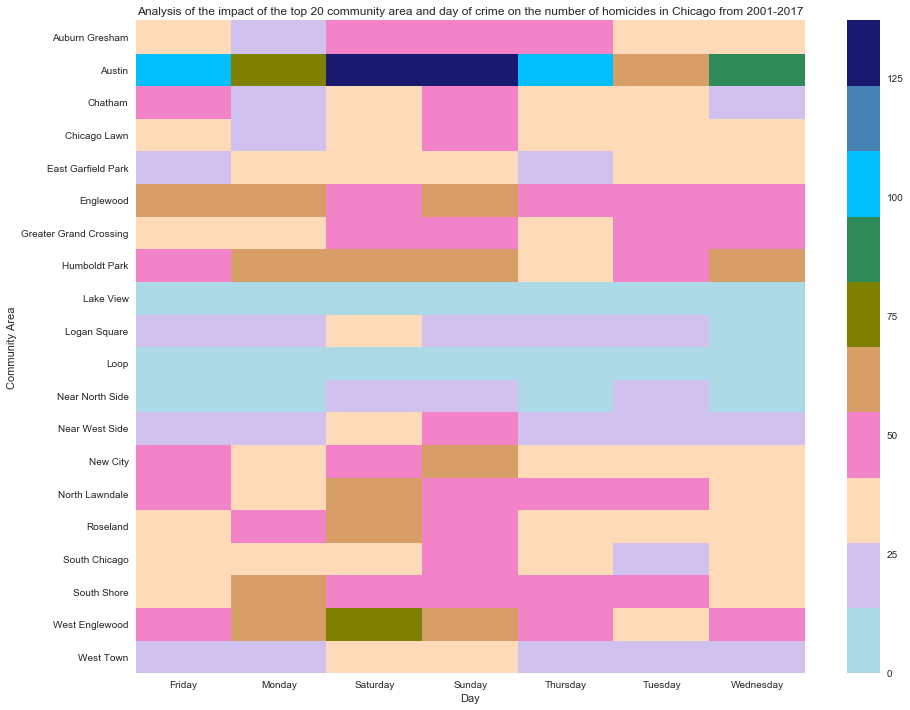

In [151]:
generate_heatmap(homicide_counts_by_day_area_df, 'Analysis of the impact of the top 20 community area and day of crime on the number of homicides in Chicago from 2001-2017', custom_cmap)

# Processing data to build a machine learning model to predict whether arrests will be made in the case of homicides

In [152]:
homicide_df = crimes_2001_17_filtered[crimes_2001_17_filtered['Primary Type']=='HOMICIDE'] 

In [153]:
homicide_df['Arrest'].value_counts()

False    4261
True     4083
Name: Arrest, dtype: int64

In [154]:
homicide_df['Description'].value_counts()

FIRST DEGREE MURDER         8314
RECKLESS HOMICIDE             27
INVOLUNTARY MANSLAUGHTER       3
Name: Description, dtype: int64

In [155]:
homicide_df['Block'].value_counts().shape

(5373,)

In [156]:
drop_columns_homicide = ['ID', 'Case Number', 'Date', 'IUCR', 'Updated On', 'Location', 'Month_Words', 'FBI Code', 'Community Area Name', 'Primary Type', 'Description']
homicide_df.drop(drop_columns_homicide, axis=1, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [157]:
homicide_df.columns

Index([u'Block', u'Location Description', u'Arrest', u'Domestic', u'Beat',
       u'District', u'Ward', u'Community Area', u'X Coordinate',
       u'Y Coordinate', u'Year', u'Latitude', u'Longitude', u'Month',
       u'DayName', u'Hour'],
      dtype='object')

In [158]:
columns_to_encode_homicide = ['Location Description', 'Arrest', 'Domestic', 'DayName', 'Block']

for cur_col_to_enc in columns_to_encode_homicide:
    homicide_df[cur_col_to_enc] = LabelEncoder().fit_transform(homicide_df[cur_col_to_enc])
    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [159]:
homicide_df['Latitude'] = homicide_df['Latitude'].astype(float)
homicide_df['Y Coordinate'] = homicide_df['Y Coordinate'].astype(float)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [160]:
X_homicide = homicide_df.drop('Arrest', axis=1)
y_homicide = homicide_df['Arrest']

In [161]:
X_homicide.shape

(8344, 15)

In [162]:
y_homicide.shape

(8344,)

In [163]:
X_homicide.columns

Index([u'Block', u'Location Description', u'Domestic', u'Beat', u'District',
       u'Ward', u'Community Area', u'X Coordinate', u'Y Coordinate', u'Year',
       u'Latitude', u'Longitude', u'Month', u'DayName', u'Hour'],
      dtype='object')

In [164]:
X_train_homicide, X_test_homicide, y_train_homicide, y_test_homicide = train_test_split(X_homicide, y_homicide, random_state=42, test_size=0.25)

In [165]:
y_train_homicide.value_counts()

0    3194
1    3064
Name: Arrest, dtype: int64

In [166]:
y_test_homicide.value_counts()

0    1067
1    1019
Name: Arrest, dtype: int64

In [167]:
param_grid_rfc_homicide = { 
    'n_estimators': [100, 250, 500, 750],
    'max_features': ['sqrt', 'log2'],
    'criterion':['gini', 'entropy'],
    'max_depth':[5, 10, 15]
}

# Grid search is being used to find the best parameters for the Random forest classifier.

In [168]:
CV_rfc_homicide = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc_homicide, cv= 10, scoring='accuracy')
CV_rfc_homicide.fit(X_train_homicide, y_train_homicide.values.ravel())

print('Best Parameters')
print(CV_rfc_homicide.best_params_)

y_pred_homicide = CV_rfc_homicide.predict(X_test_homicide)

print('accuracy', accuracy_score(y_test_homicide, y_pred_homicide))
print('precision', precision_score(y_test_homicide, y_pred_homicide))
print('recall', recall_score(y_test_homicide, y_pred_homicide))
print('f1_score', f1_score(y_test_homicide, y_pred_homicide))
print('roc auc score', roc_auc_score(y_test_homicide, y_pred_homicide))

Best Parameters
{'max_features': 'sqrt', 'n_estimators': 750, 'criterion': 'entropy', 'max_depth': 15}
('accuracy', 0.70038350910834135)
('precision', 0.71137339055793991)
('recall', 0.6506378802747792)
('f1_score', 0.6796514607893388)
('roc auc score', 0.69926458212426867)


In [169]:
rfc_best_params_homicide = RandomForestClassifier(random_state=0, n_jobs=-1, oob_score=True, class_weight='balanced', max_features='sqrt', n_estimators=750, criterion='entropy', max_depth=15)
rfc_best_params_homicide.fit(X_train_homicide, y_train_homicide.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=750, n_jobs=-1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [170]:
feature_importances_homicide = rfc_best_params_homicide.feature_importances_
indices_homicide = np.argsort(feature_importances_homicide)[::-1]
features_homicide = list(X_train_homicide.columns)
features_list_homicide = []
importances_list_homicide = []
for f in range(X_train_homicide.shape[1]):
    features_list_homicide.append(features_homicide[indices_homicide[f]])
    importances_list_homicide.append(feature_importances_homicide[indices_homicide[f]])
    print("%d. feature %s (%f)" % (f + 1, features_homicide[indices_homicide[f]], feature_importances_homicide[indices_homicide[f]]))

1. feature Year (0.120861)
2. feature Block (0.086006)
3. feature Y Coordinate (0.084366)
4. feature Latitude (0.084087)
5. feature Longitude (0.083734)
6. feature X Coordinate (0.083216)
7. feature Domestic (0.074731)
8. feature Hour (0.068513)
9. feature Location Description (0.061128)
10. feature Beat (0.059007)
11. feature Month (0.058407)
12. feature DayName (0.043888)
13. feature Community Area (0.037277)
14. feature Ward (0.035285)
15. feature District (0.019495)


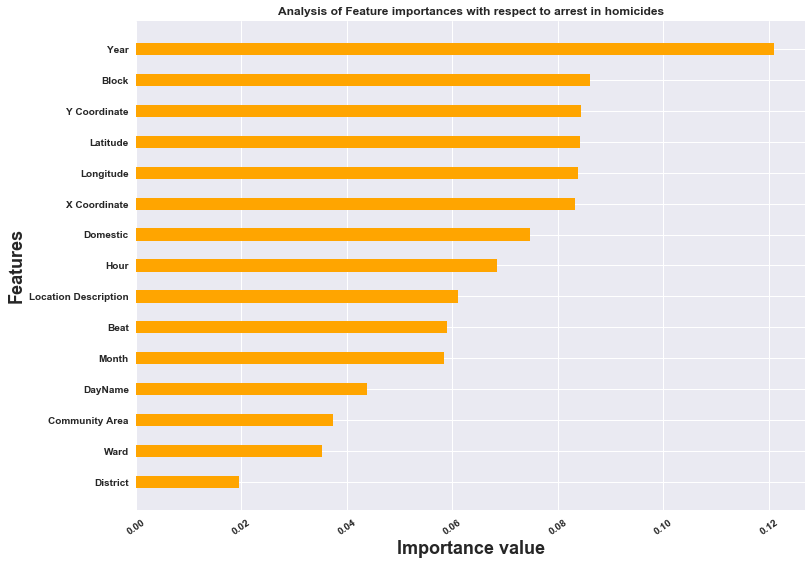

In [171]:
pylab.rcParams['figure.figsize'] = 12, 9
fig14, ax13 = plt.subplots()

generate_horizontalBarChart(ax13, np.arange(len(features_list_homicide)), importances_list_homicide, 'orange', features_list_homicide, 'Importance value', 'Features', 'Analysis of Feature importances with respect to arrest in homicides', 35, grouped=False)